# PRÁCTICA DE APA

Ivan Cobos Navarro


## Elección del dataset
**Descripcion** :  

    Hemos escogido el dataset statlog_german_credit_data de fetch_ucirepo.  
    Este dataset consiste de 20 variables mixtas numericas y categóricas.  
    El problema es de clasificación binaria en el que se tiene que intentar predecir si hay que ceder el crédito o no segun las diferentes carácterísticas del prestario.

In [ ]:

#install libraries

#!pip3 install matplotlib  --upgrade --quiet
#!pip3 install seaborn  --upgrade --quiet
#!pip3 install scikit-learn --upgrade --quiet
#!pip3 install pandas --upgrade --quiet
#!pip3 install numpy  --upgrade --quiet
#!pip install ucimlrepo --upgrade --quiet
#!pip install missingno --upgrade --quiet
#pip install ucimlrepo --upgrade --quiet
#!pip install category-encoders --upgrade --quiet



[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [70]:
# Importing the libraries and global variables
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


#random seed para reproducibilidad
random = 0

In [77]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## Visualizacion de los datos antes del Preprocesado

Unimos los features y los targets en un único dataset y cambiamos los nombres a las variables y a los posibles valores de las variables categóricas para una mejor visualización.

In [78]:
# Cargar dataset
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combinar características y objetivo en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Obtener el DataFrame de variables
variables_df = statlog_german_credit_data.variables

# Filtrar variables_df para excluir 'class'
variables_to_rename = variables_df[variables_df['name'] != 'class']

# Reemplazar espacios por guiones bajos en las descripciones
variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')

# Crear un diccionario que mapee 'name' a 'description_underscore', excluyendo 'class'
name_to_description = dict(zip(variables_to_rename['name'], variables_to_rename['description_underscore']))

# Renombrar las columnas del DataFrame, excluyendo 'class'
df = df.rename(columns=name_to_description)

# Ahora puedes utilizar las listas de variables actualizadas
numerical_cols_original = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
categorical_cols_original = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10',
                             'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Actualizar las listas con los nuevos nombres
numerical_cols = [name_to_description.get(col, col) for col in numerical_cols_original]
categorical_cols = [name_to_description.get(col, col) for col in categorical_cols_original]

#Se hace para que sea legible los valores de las variables categóricas
mapping_attribute1 = {
    'A11': '... < 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '... >= 200 DM',
    'A14': 'no checking account'
}
mapping_attribute3 = {
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/ other credits existing (not at this bank)'
}
mapping_attribute4 = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}
mapping_attribute6 = {
    'A61': '... < 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '... >= 1000 DM',
    'A65': 'unknown/ no savings account'
}
mapping_attribute7 = {
    'A71': 'unemployed',
    'A72': '... < 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '... >= 7 years'
}
mapping_attribute9 = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}
mapping_attribute10 = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}
mapping_attribute12 = {
    'A121': 'real estate',
    'A122': 'building society savings/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}
mapping_attribute14 = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
mapping_attribute15 = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}
mapping_attribute17 = {
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified'
}
mapping_attribute19 = {
    'A191': 'none',
    'A192': 'yes, registered under the customer\'s name'
}
mapping_attribute20 = {
    'A201': 'yes',
    'A202': 'no'
}
# Aplicar los mapeos de las variables categoricas al DataFrame para que sea más legible
df['Status_of_existing_checking_account'] = df['Status_of_existing_checking_account'].map(mapping_attribute1)
df['Credit_history'] = df['Credit_history'].map(mapping_attribute3)
df['Purpose'] = df['Purpose'].map(mapping_attribute4)
df['Savings_account/bonds'] = df['Savings_account/bonds'].map(mapping_attribute6)
df['Present_employment_since'] = df['Present_employment_since'].map(mapping_attribute7)
df['Personal_status_and_sex'] = df['Personal_status_and_sex'].map(mapping_attribute9)
df['Other_debtors_/_guarantors'] = df['Other_debtors_/_guarantors'].map(mapping_attribute10)
df['Property'] = df['Property'].map(mapping_attribute12)
df['Other_installment_plans'] = df['Other_installment_plans'].map(mapping_attribute14)
df['Housing'] = df['Housing'].map(mapping_attribute15)
df['Job'] = df['Job'].map(mapping_attribute17)
df['Telephone'] = df['Telephone'].map(mapping_attribute19)
df['foreign_worker'] = df['foreign_worker'].map(mapping_attribute20)

"""
df tiene los valores de las variables categóricas reemplazados por cadenas de texto más descriptivas.
y los nombres de las columnas se han actualizado para que sean más legibles.
"""

num_filas = df.shape[0]

print(f"El número de instancias (filas) es: {num_filas}")

print(f"\nLas primeras 5 filas del DataFrame son: {df.head()}")



El número de instancias (filas) es: 1000

Las primeras 5 filas del DataFrame son:   Status_of_existing_checking_account  Duration  \
0                          ... < 0 DM         6   
1                   0 <= ... < 200 DM        48   
2                 no checking account        12   
3                          ... < 0 DM        42   
4                          ... < 0 DM        24   

                                      Credit_history              Purpose  \
0  critical account/ other credits existing (not ...     radio/television   
1           existing credits paid back duly till now     radio/television   
2  critical account/ other credits existing (not ...            education   
3           existing credits paid back duly till now  furniture/equipment   
4                    delay in paying off in the past            car (new)   

   Credit_amount        Savings_account/bonds Present_employment_since  \
0           1169  unknown/ no savings account           ... >= 7 years   


/tmp/ipykernel_4210/4129261621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')


In [33]:
def visualize_numerical(df, numerical_cols=None):
    """
    Visualiza variables numéricas mediante histogramas y diagramas de caja.

    Parámetros:
    - df: DataFrame de pandas que contiene los datos.
    - numerical_cols: Lista de nombres de columnas numéricas. Si es None, se detectan automáticamente.
    """
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Diagrama de caja
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'{col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

def visualize_categorical(df, categorical_cols):
    """
    Visualiza variables categóricas mediante gráficos de barras.
    """

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        order = df[col].value_counts().index  # Ordenar por frecuencia

        # Obtener una paleta de colores con tantos colores como categorías
        palette = sns.color_palette('viridis', n_colors=len(order))

        # Crear el gráfico sin especificar 'palette' ni 'hue'
        ax = sns.countplot(x=col, data=df, order=order)

        # Asignar los colores manualmente a cada barra
        for i, patch in enumerate(ax.patches):
            patch.set_facecolor(palette[i % len(palette)])

        plt.title(f'Conteo de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



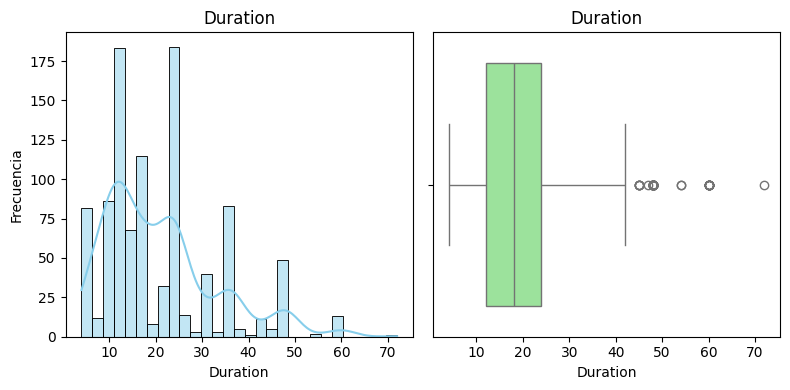

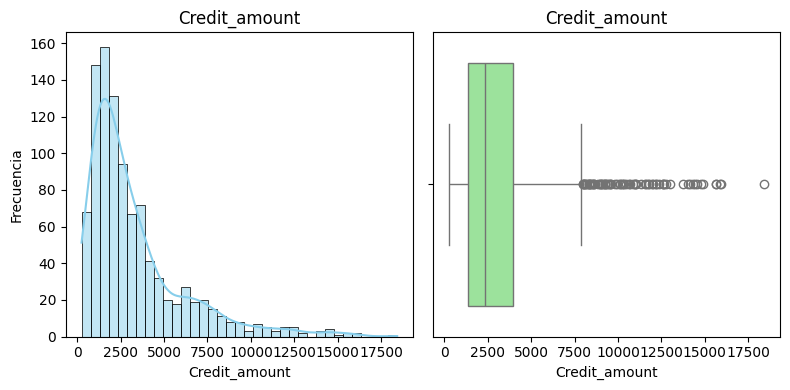

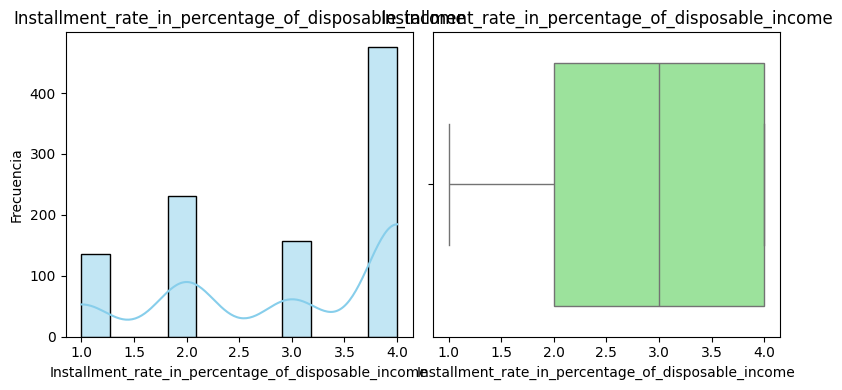

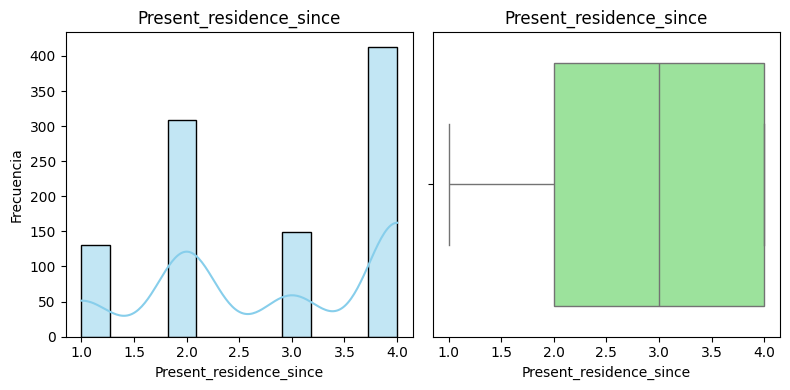

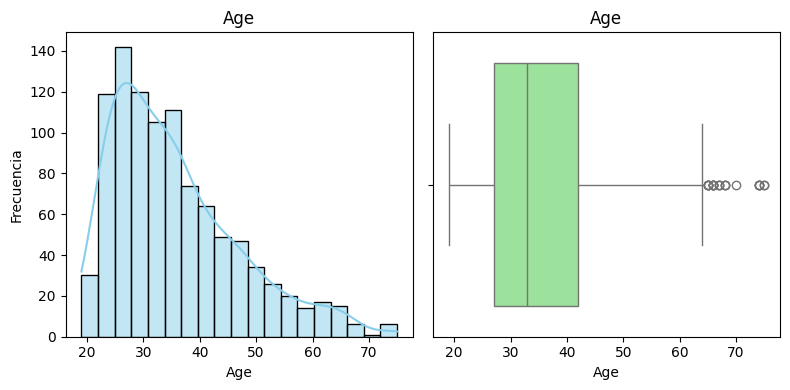

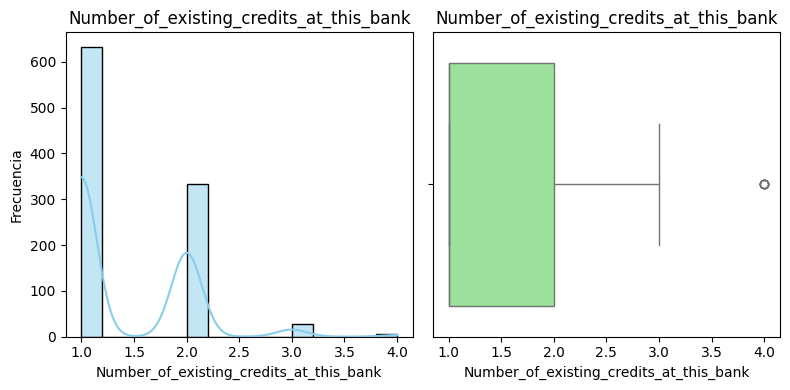

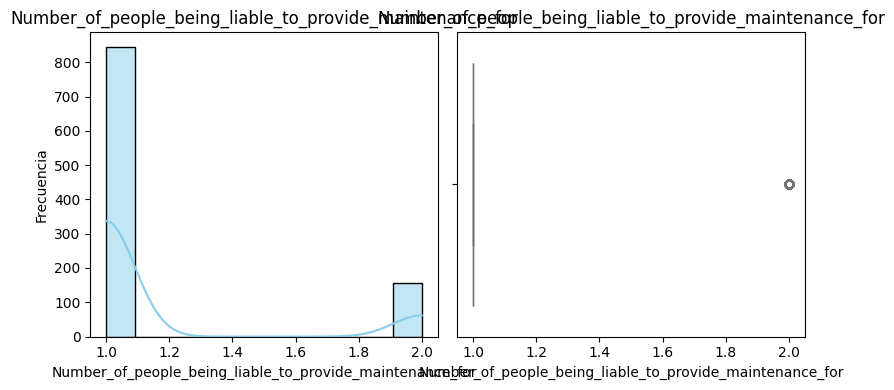

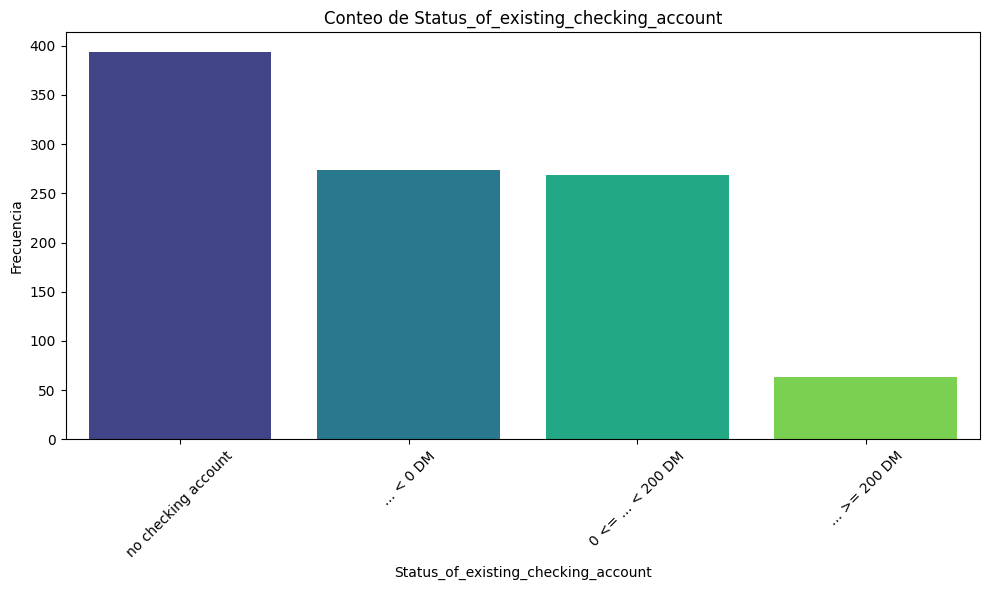

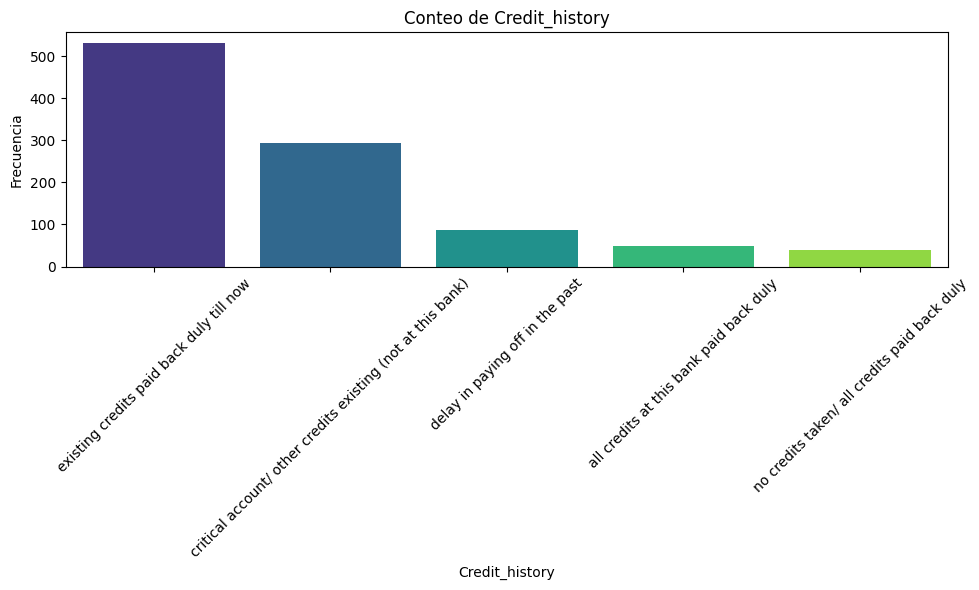

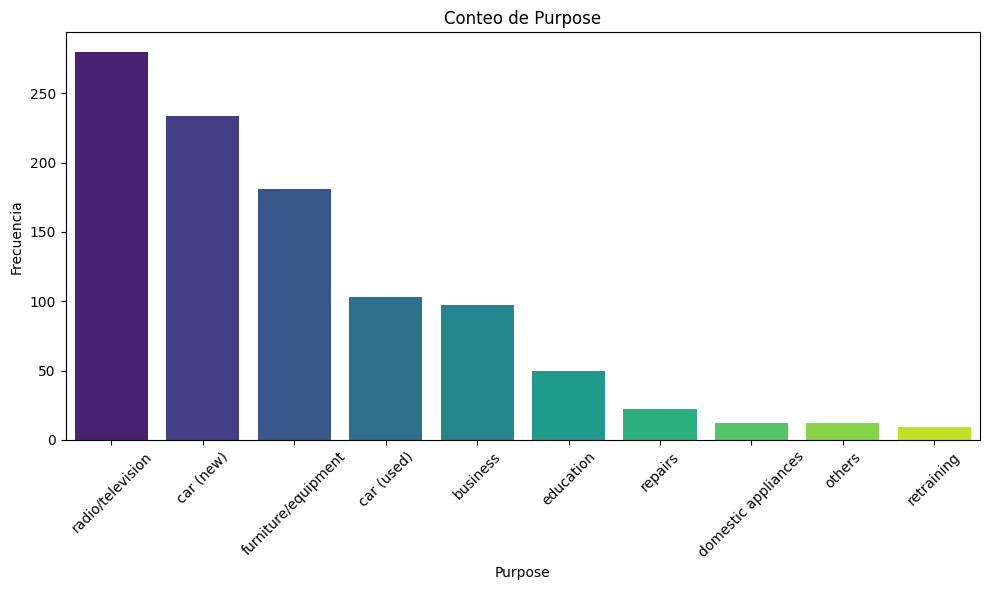

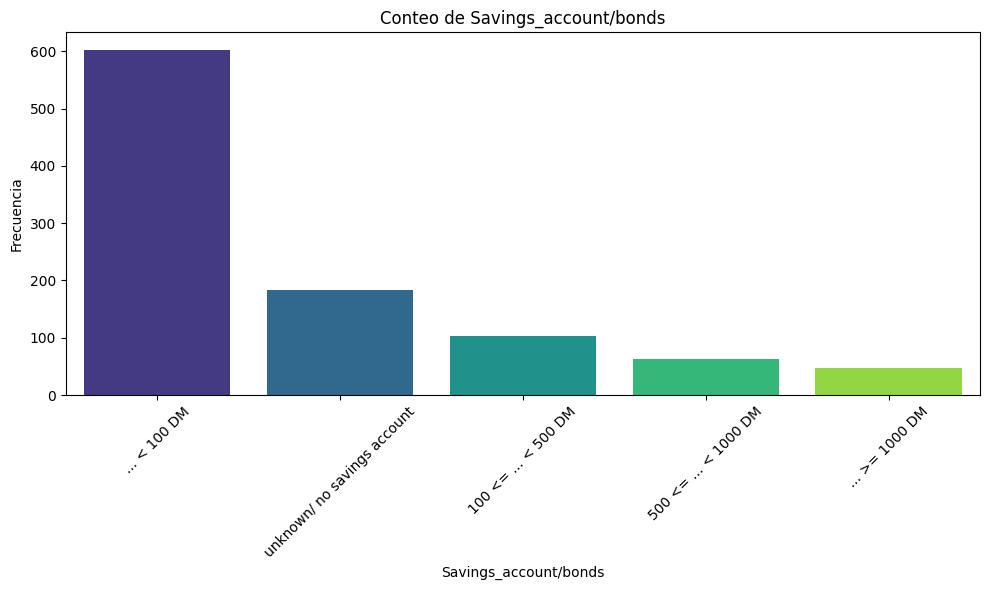

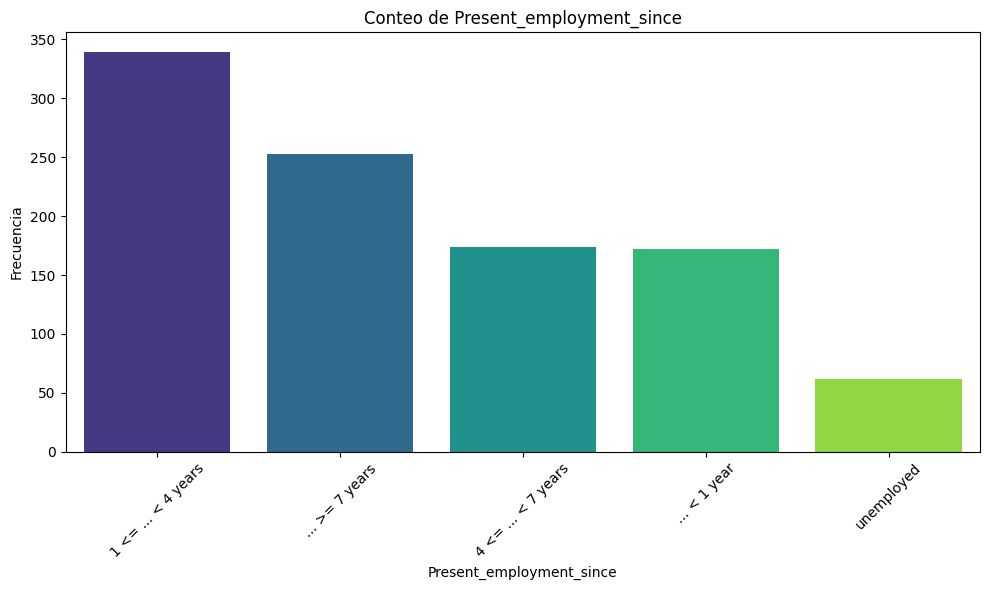

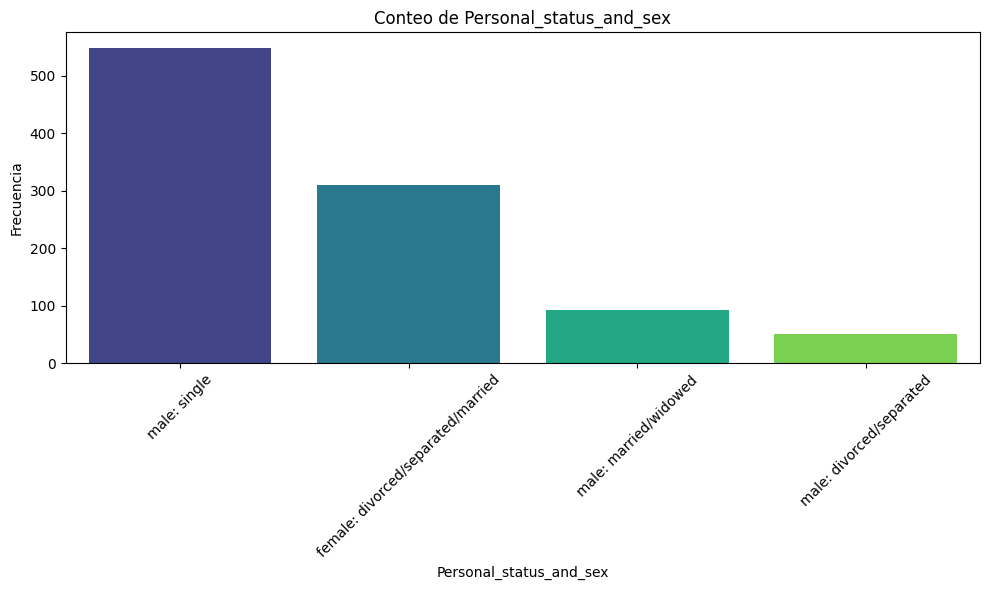

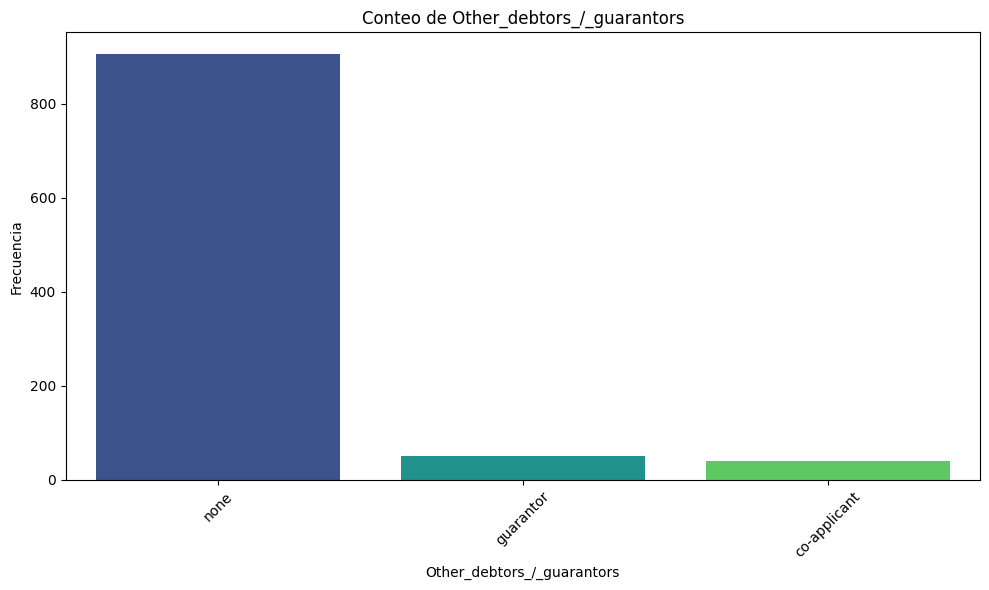

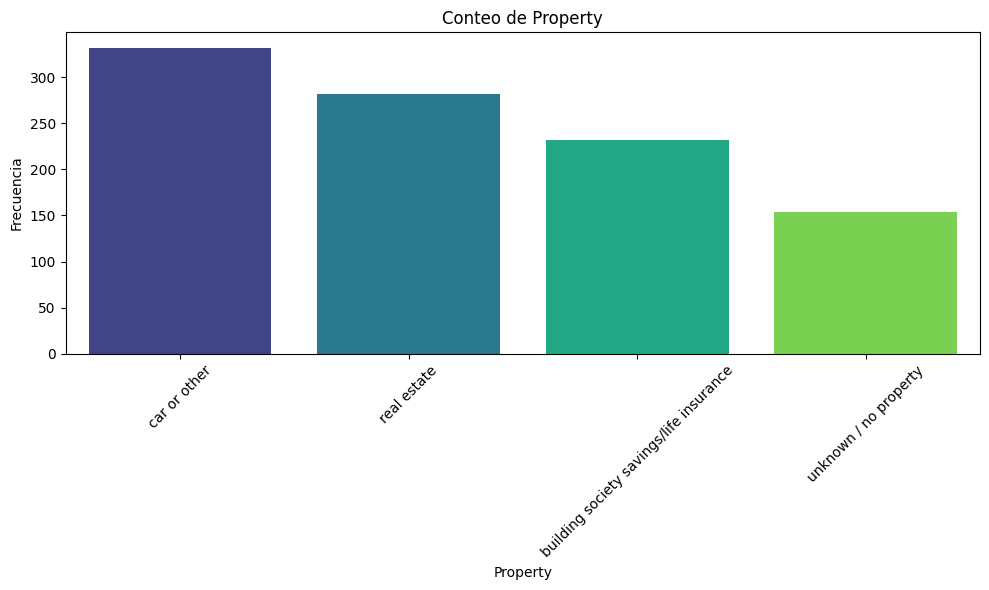

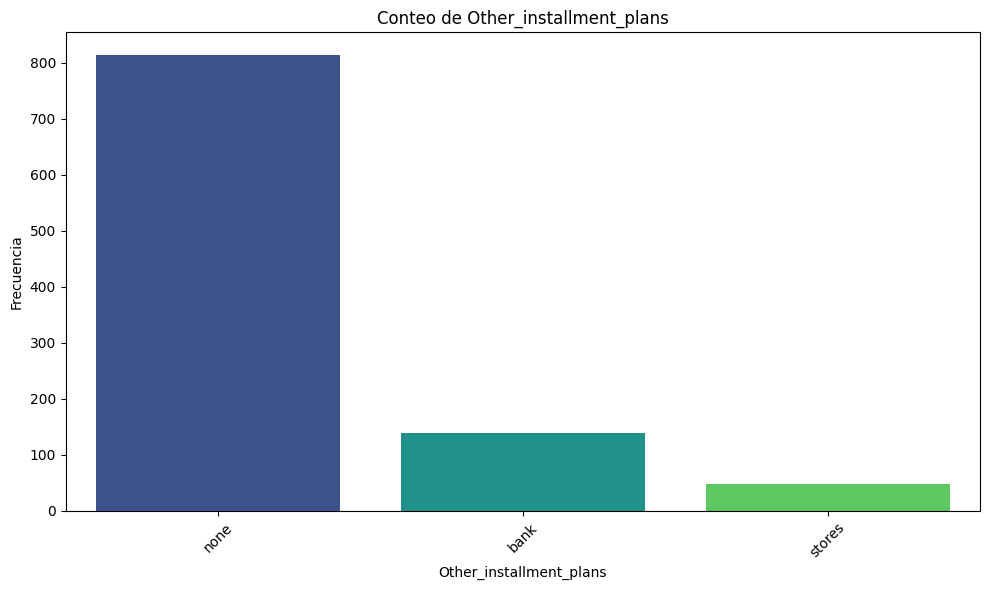

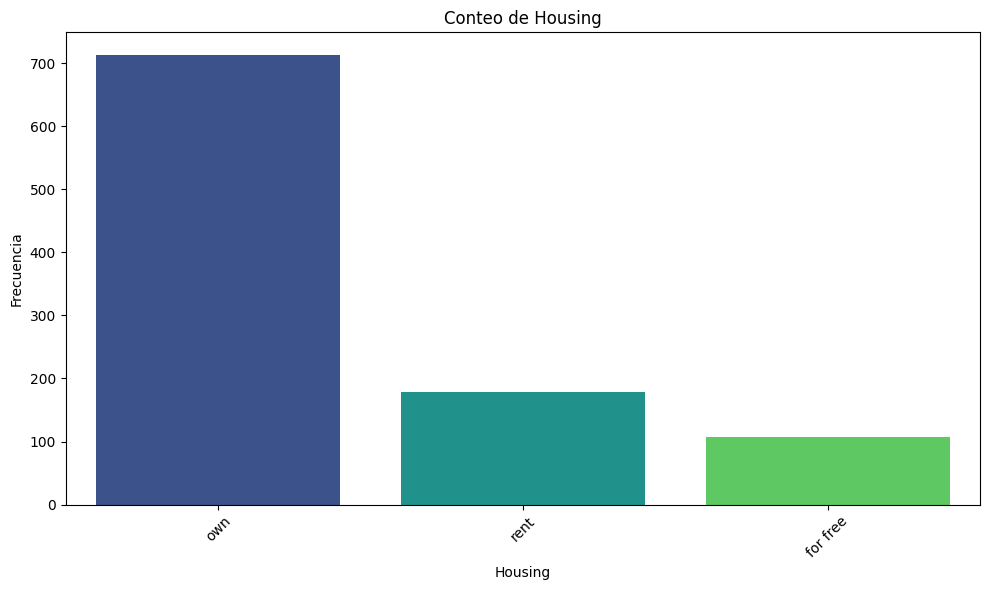

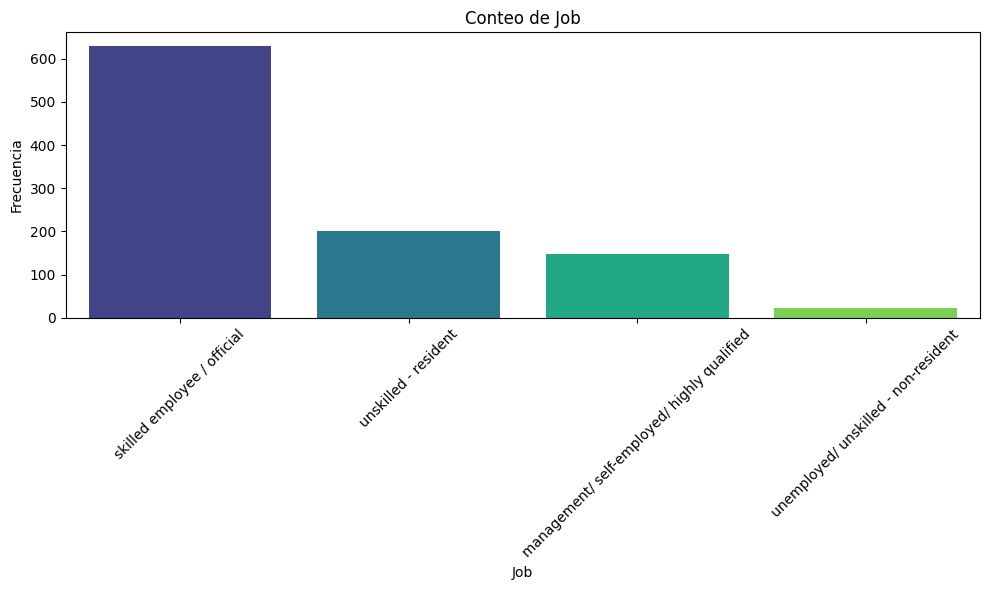

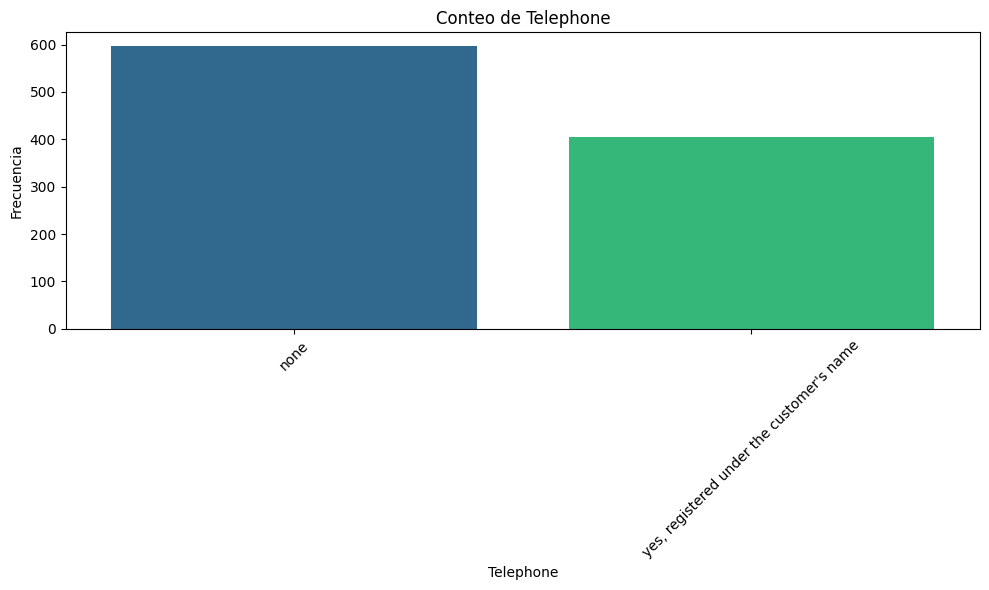

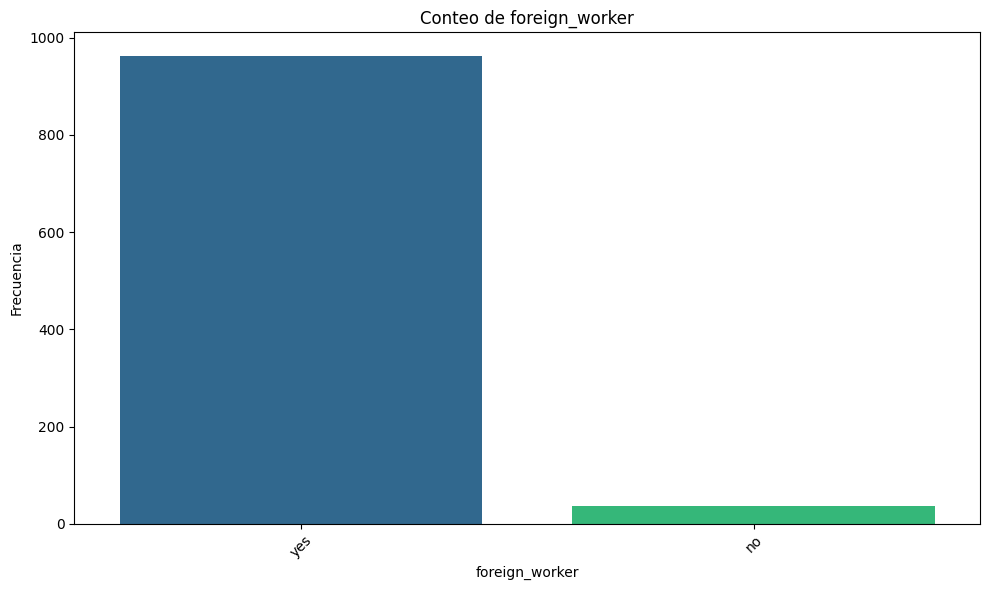

In [8]:
visualize_numerical(df, numerical_cols)
visualize_categorical(df, categorical_cols)

Al analizar la visualización de las variables numéricas, podemos confirmar que no se encuentran valores perdidos en el conjunto de datos, lo cual facilita el análisis y garantiza que todas las observaciones están completas. Asimismo, en los diagramas de caja no se observan valores atípicos o outliers significativos, lo cual sugiere que las características numéricas se distribuyen de manera consistente sin presencia de puntos extremos que puedan distorsionar el análisis.

Al examinar los histogramas de algunas variables, observamos que no siguen una distribución normal, lo cual es esperado dada la naturaleza de estas características. Por ejemplo, variables como el número de créditos existentes en el banco no presentan una curva simétrica, ya que se espera que esta variable esté concentrada en ciertos valores debido a las prácticas de crédito estándar. Esta falta de normalidad es común en datos financieros y no representa necesariamente un problema para el análisis.

En la visualización de las variables categóricas, observamos una distribución balanceada y desequilibrada en diferentes variables, que refleja la diversidad y características de los solicitantes de crédito. Mediante un tratamiento adecuado del desequilibrio en algunas categorías, podemos mejorar la capacidad del modelo para capturar patrones significativos y asegurar que aprenda de manera equilibrada y representativa de todo el conjunto de datos.

['Duration', 'Credit_amount', 'Installment_rate_in_percentage_of_disposable_income', 'Present_residence_since', 'Age', 'Number_of_existing_credits_at_this_bank', 'Number_of_people_being_liable_to_provide_maintenance_for']


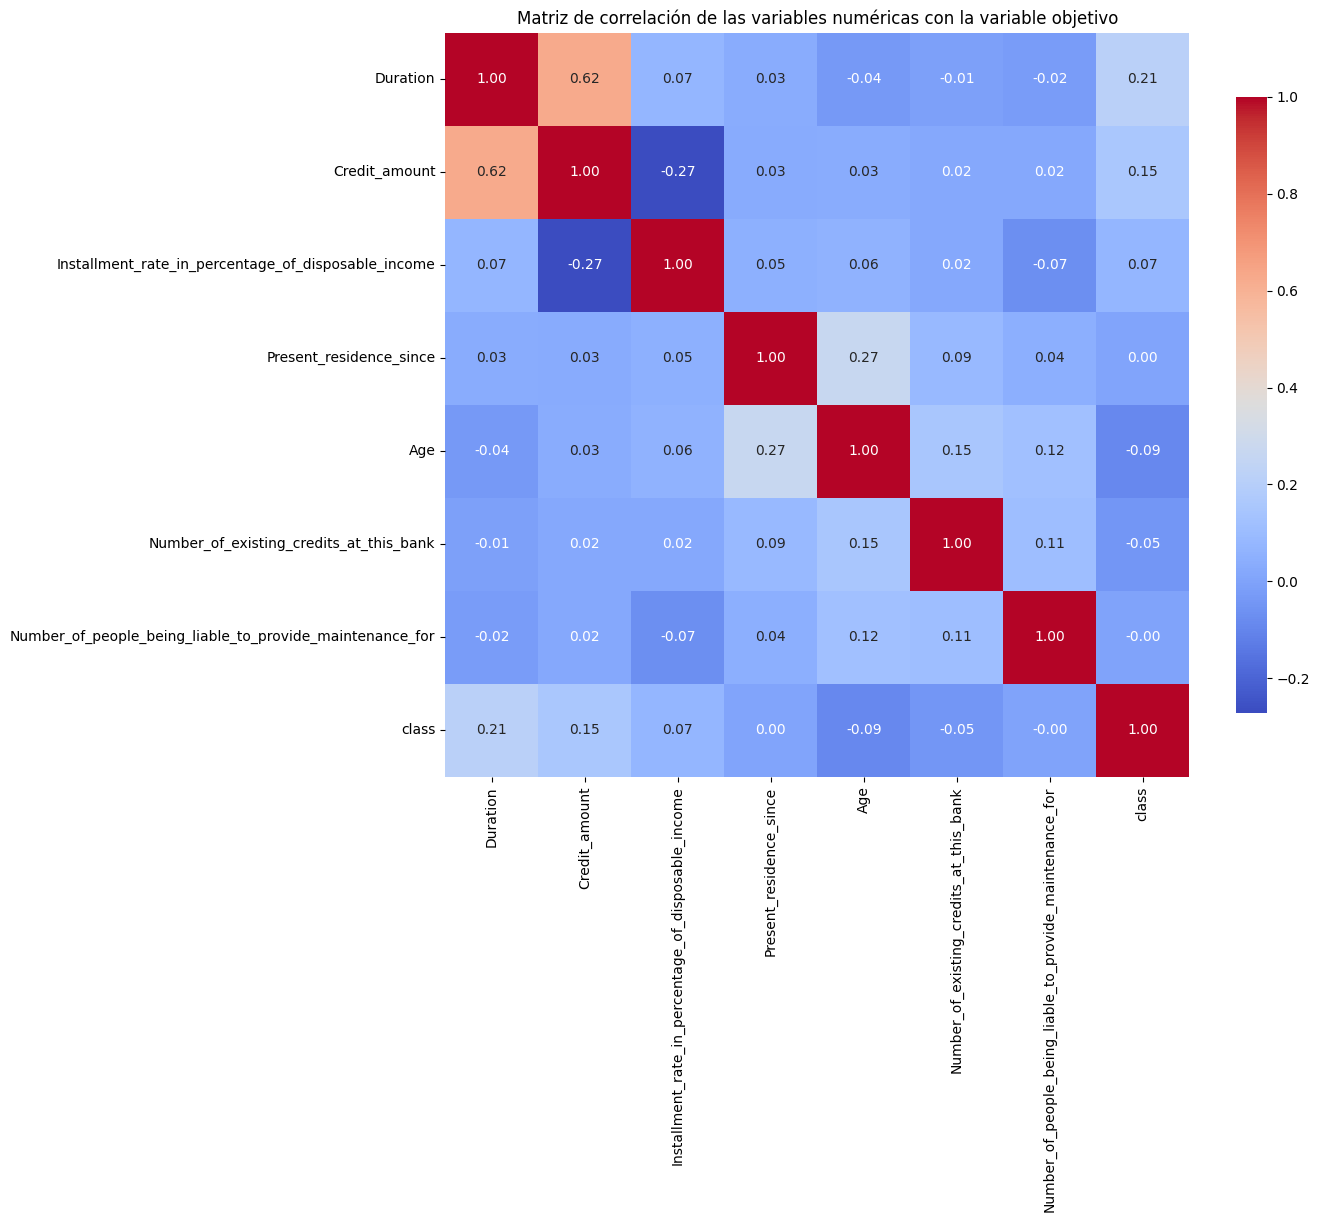

In [79]:

numerical_cols_with_target = numerical_cols + ['class']

print(numerical_cols)

corr_matrix_with_target = df[numerical_cols_with_target].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de correlación de las variables numéricas con la variable objetivo')
plt.show()


Al observar la matriz de correlación de las variables numéricas, notamos que la mayoría de los coeficientes de correlación se encuentran muy cerca de 0. Esto sugiere que, en general, las variables numéricas del conjunto de datos no presentan relaciones lineales fuertes entre sí. Este bajo grado de correlación implica que cada variable aporta información relativamente independiente, lo cual puede ser beneficioso para el modelo, ya que no se corre el riesgo de redundancia o multicolinealidad significativa entre las variables numéricas.

Sin embargo, hay una excepción: encontramos una correlación de aproximadamente 0.62 entre las variables Duration y Credit Amount. Una correlación positiva en este caso tendría sentido: a medida que aumenta la cantidad solicitada, es probable que también se extienda la duración del préstamo para permitir pagos más asequibles.

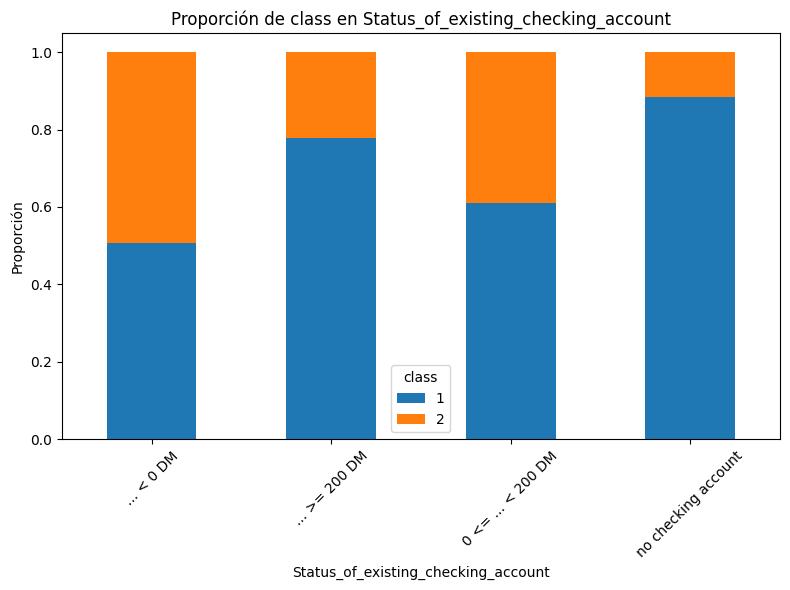

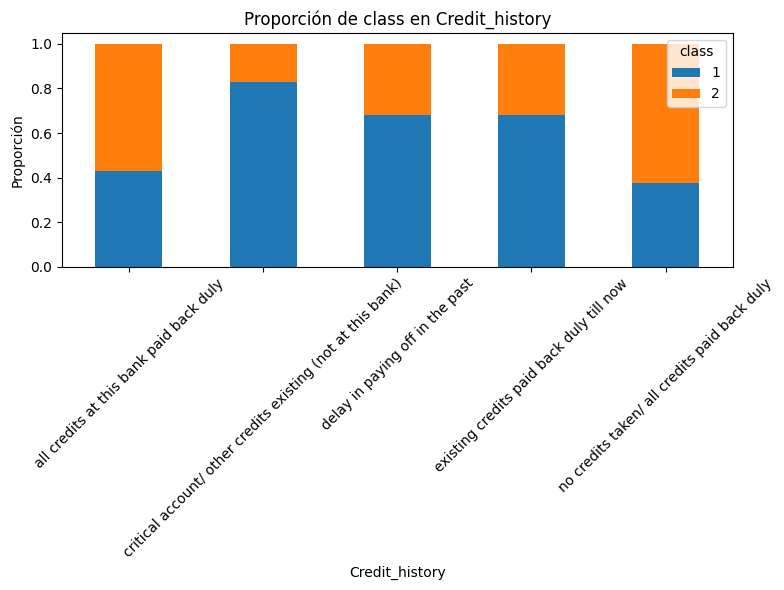

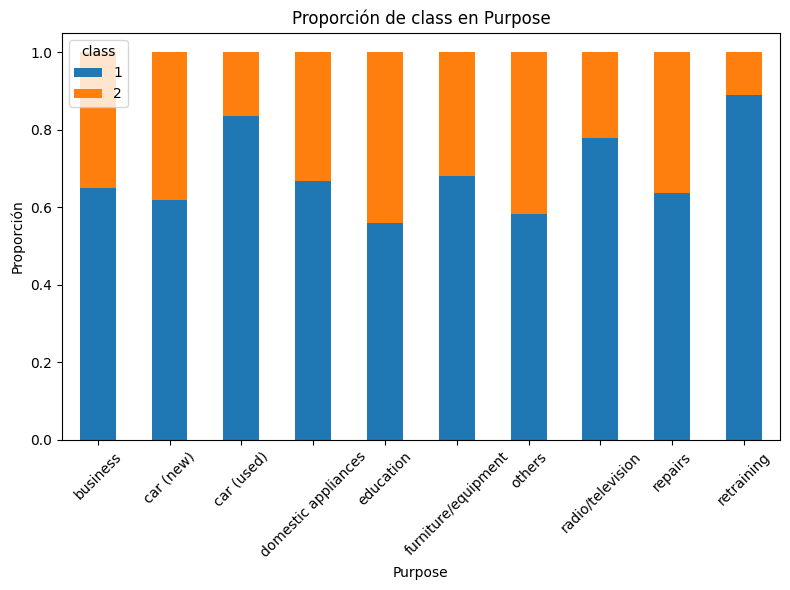

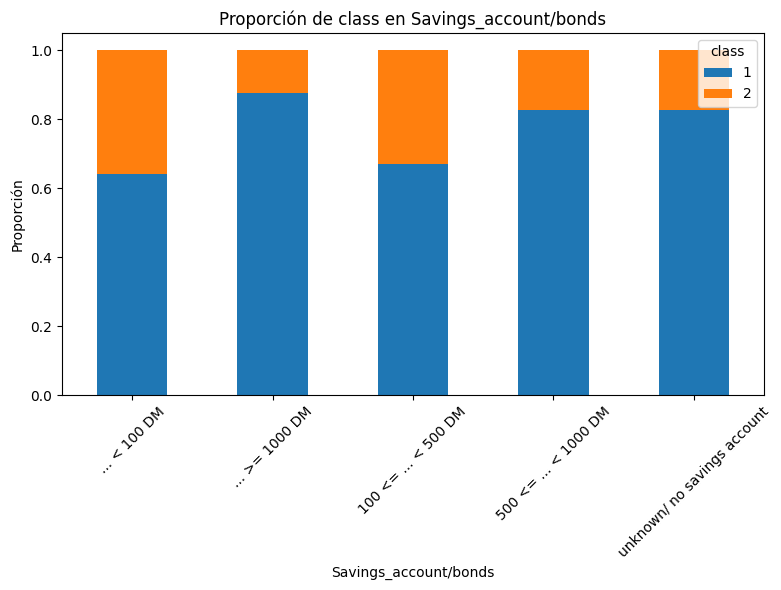

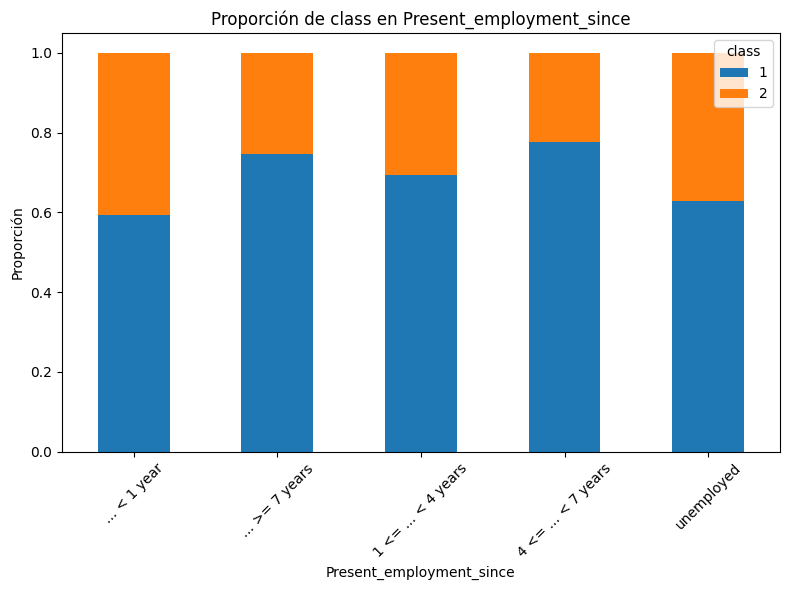

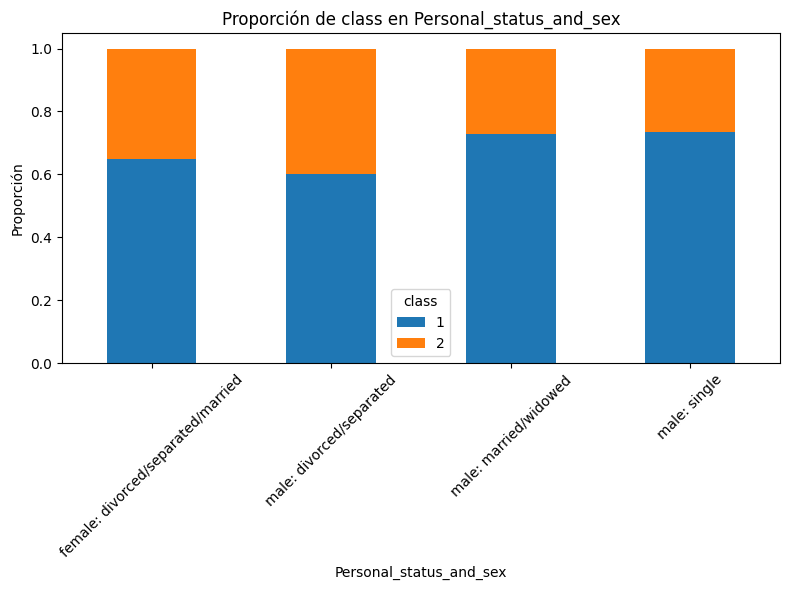

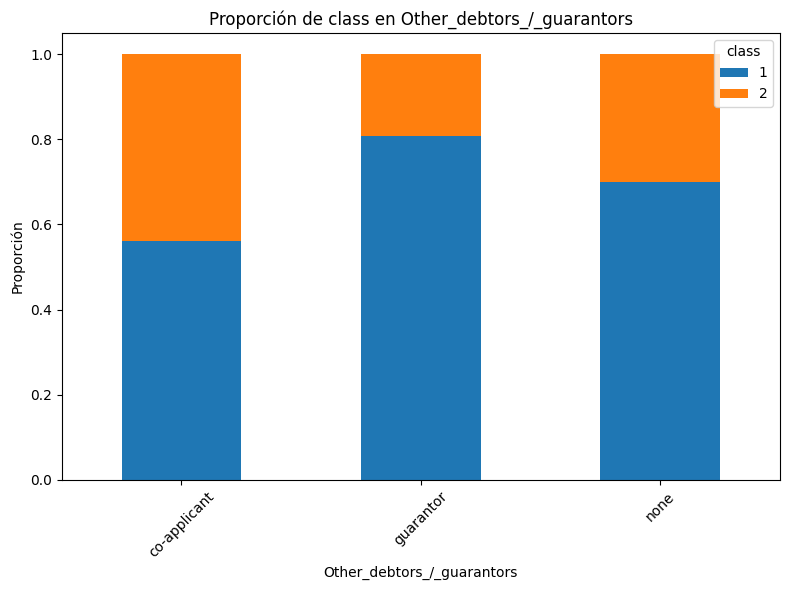

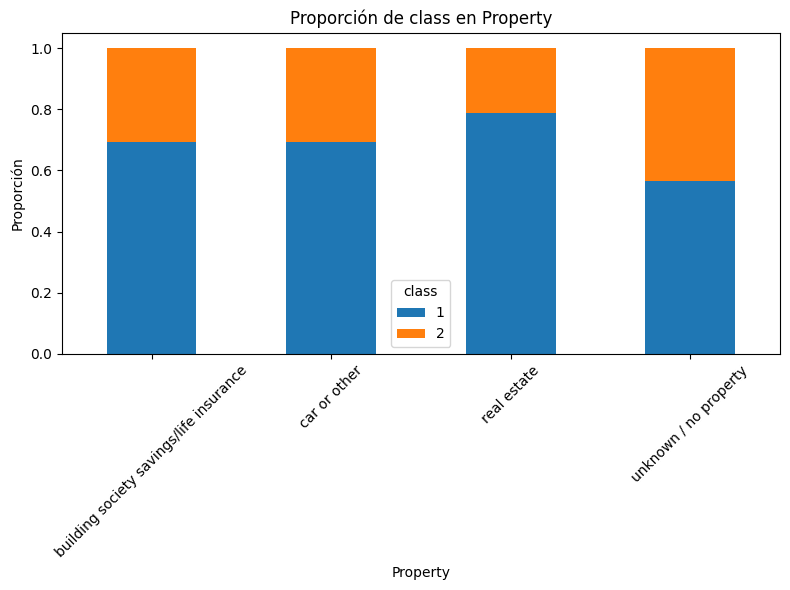

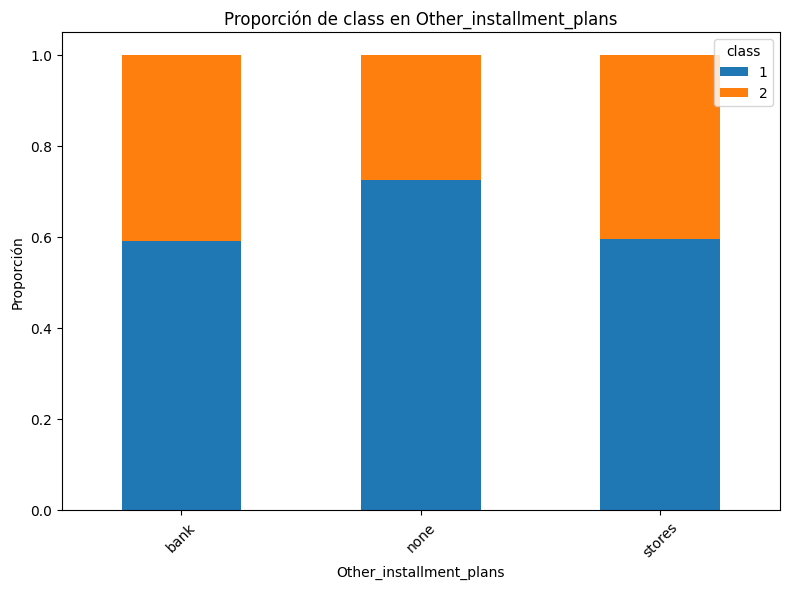

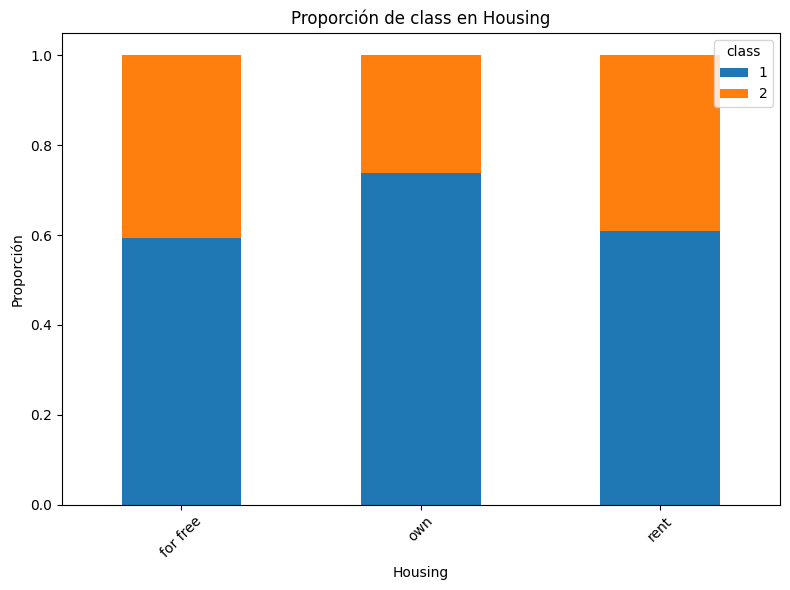

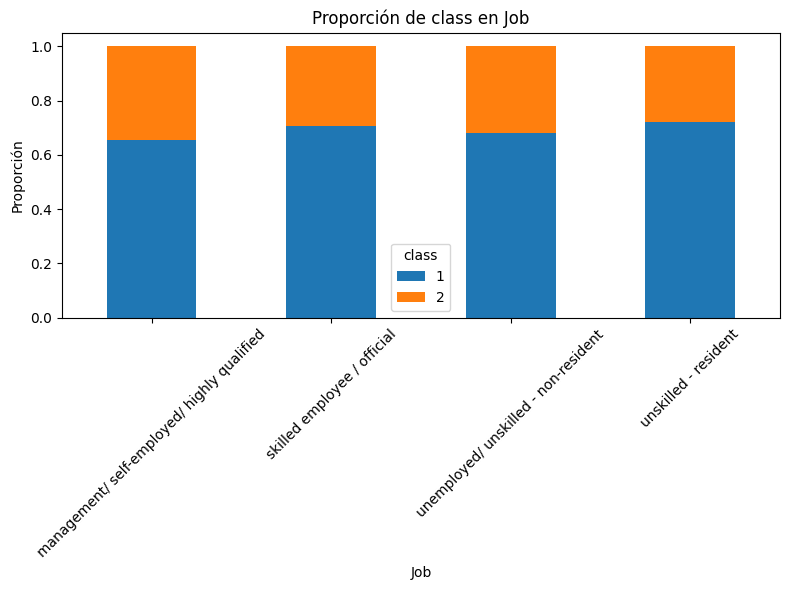

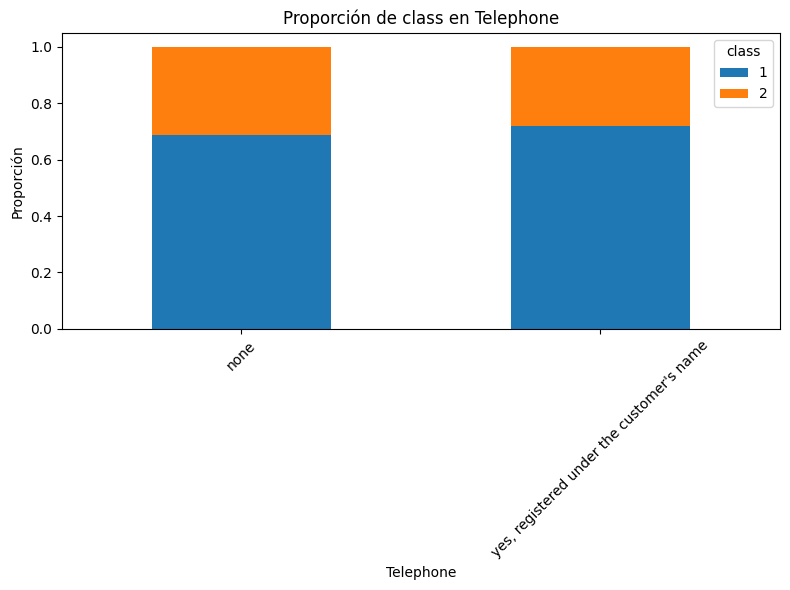

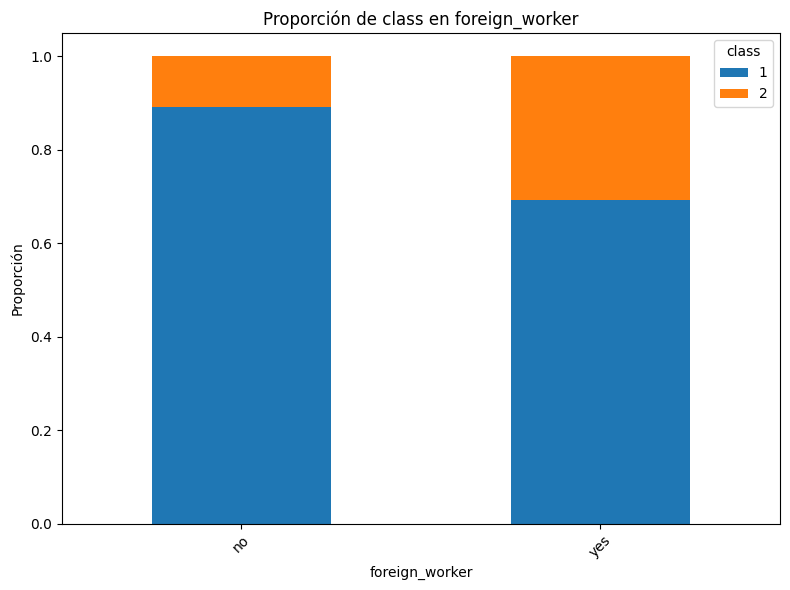

In [10]:
def visualize_categorical_vs_target_stacked(df, categorical_cols, target_col):

    figsize = (8,6)
    for col in categorical_cols:
        ct = pd.crosstab(df[col], df[target_col], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=figsize)
        plt.title(f'Proporción de {target_col} en {col}')
        plt.xlabel(col)
        plt.ylabel('Proporción')
        plt.legend(title=target_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


#class: 1 = good , 2 = bad
visualize_categorical_vs_target_stacked(df, categorical_cols, 'class')


Estos gráficos de barras apiladas nos permiten analizar la proporción de la variable objetivo (class) dentro de cada categoría de las variables categóricas. Este tipo de gráfico apilado muestra, para cada categoría, la distribución proporcional de las clases (en este caso, "Good" y "Bad"), permitiendo observar si alguna categoría está más asociada a una de las clases.

En este caso concreto, no parece que ninguna categoría muestre una tendencia claramente dominante hacia una u otra clase de riesgo. Esto sugiere que, al menos a primera vista, ninguna de las categorías se destaca significativamente como indicador del riesgo de un préstamo.

    Estas gráficas nos muestran además que será necesario estratificar los datos cuando los vayamos a dividir en entrenamiento y test ya que podemos observar como hay más ejemplos con la clase "good" que "bad" 

## Preprocesamiento

En este apartado aplicaremos el preprocesamiento a los datos según lo que hemos observado en las gráficas y según información adicional que miraremos durante este proceso.
### Missing Values
Observemos si existen missing values:

In [34]:
df.isnull().sum()

Status_of_existing_checking_account                         0
Duration                                                    0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account/bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_/_guarantors                                  0
Present_residence_since                                     0
Property                                                    0
Age                                                         0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

No existen valores perdidos.   

### Outliers y valores incoherentes o incorrectos

Miremos si hay valores extremos que debamos tener en cuenta. Segun lo que hemos podido ver de los gráficos en la visualizacion inicial de los datos,
no hay valores perdidos codificados como valores extremos (podría ser que en vez de null los valores perdidos tuvieran un valor extremo para indicarse) y tampoco  
observamos que debieramos eliminar ninguna instancia por incoherente ya que todas tienen sus variables con valores dentro de los rangos y distribuciones que supondriamos.

Aún así vamos a aplicar un algoritmo como **LocalOutlierFactor** de scikit para ver que instancias considera outliers.

In [88]:

# Preparar datos numéricos
df_numerico = df[numerical_cols]

# Configurar y ajustar LOF
local_outlier_factor = LocalOutlierFactor(n_neighbors=20) # Número de vecinos a considerar
result = local_outlier_factor.fit_predict(df_numerico.values)

# Identificar outliers y puntos normales
outliers = result == -1
no_outliers = result == 1

# Ver número de outliers
print(f"Número de outliers detectados: {outliers.sum()}")

Número de outliers detectados: 4


Con 20 vecinos detecta 4 outliers veamos cuales son:

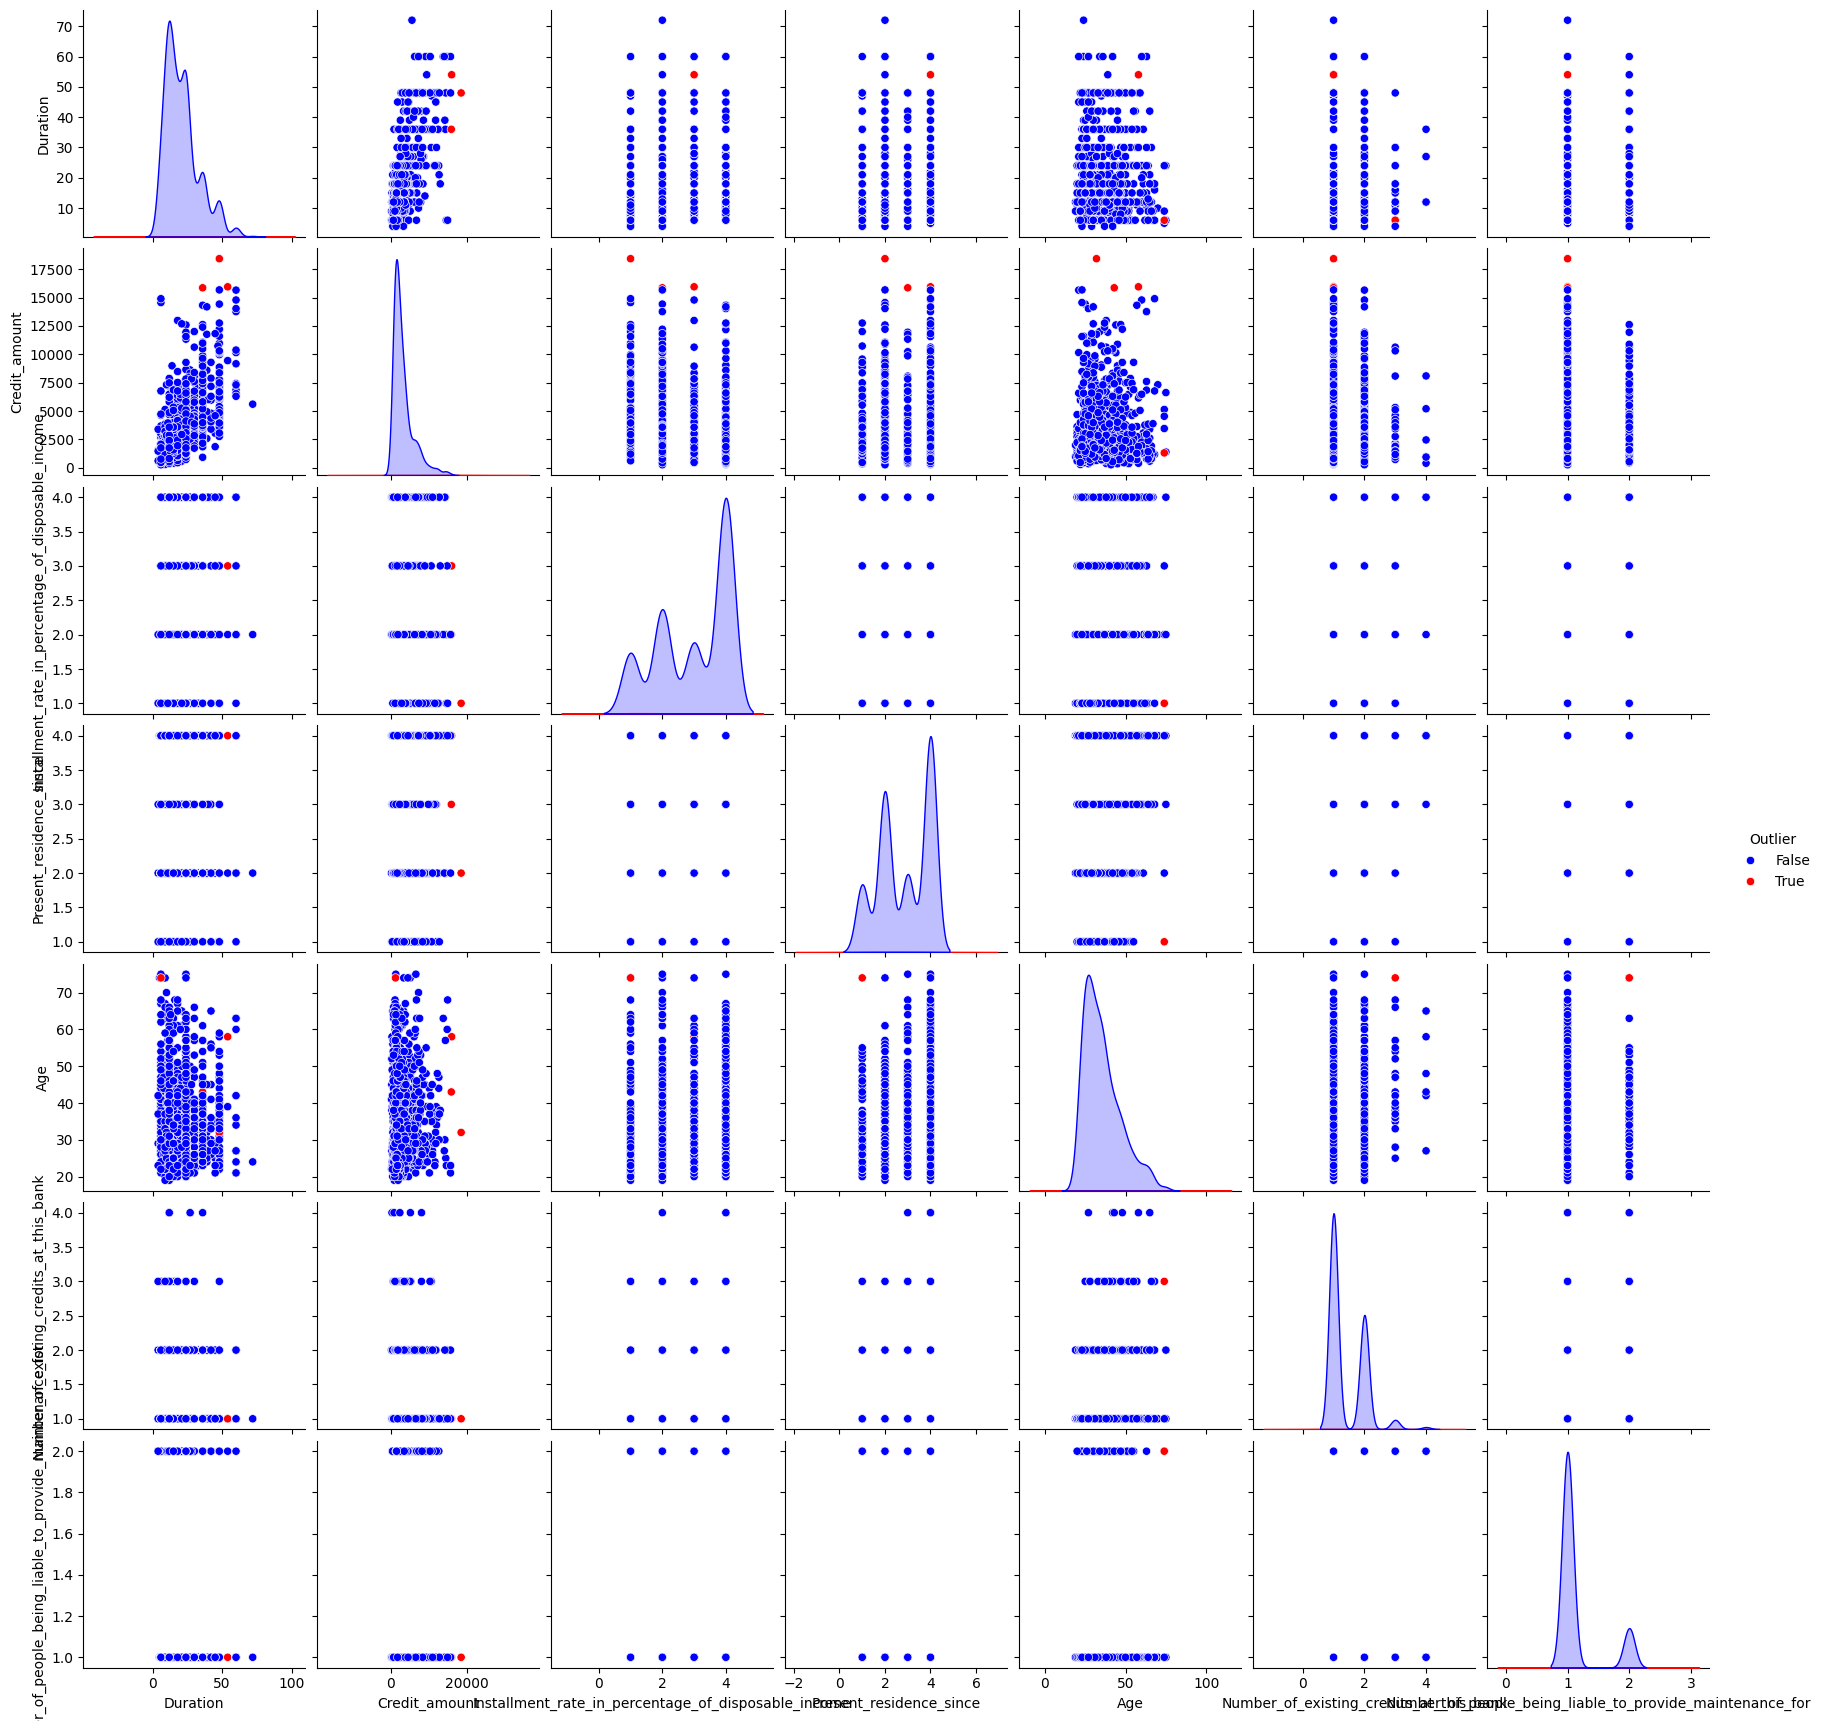

In [89]:
def plot_outliers(df_numerico, outliers):
    """
    Visualiza pares de variables numéricas, coloreando por outliers.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - outliers: Array booleano que indica si cada instancia es un outlier.
    - numerical_cols: Lista de nombres de columnas numéricas.
    """
    df_plot = df_numerico.copy()
    df_plot["Outlier"] = outliers

    sns.pairplot(df_plot, hue="Outlier", palette={0: "blue", 1: "red"}, diag_kind="kde")
    plt.show()

plot_outliers(df_numerico, outliers)

Podemos observar como 3 de los 4 outliers coinciden con los valores de credit_amount más alto probablemente sea porque la escala es mucho mayor a la resta de variables.  
Probemos a estandarizar antes de hacer todo este proceso:

Tipos de datos en el DataFrame:
Primeras filas del DataFrame estandarizado:
   Duration  Credit_amount  \
0 -1.236478      -0.745131   
1  2.248194       0.949817   
2 -0.738668      -0.416562   
3  1.750384       1.634247   
4  0.256953       0.566664   

   Installment_rate_in_percentage_of_disposable_income  \
0                                           0.918477     
1                                          -0.870183     
2                                          -0.870183     
3                                          -0.870183     
4                                           0.024147     

   Present_residence_since       Age  Number_of_existing_credits_at_this_bank  \
0                 1.046987  2.766456                                 1.027079   
1                -0.765977 -1.191404                                -0.704926   
2                 0.140505  1.183312                                -0.704926   
3                 1.046987  0.831502                                -0

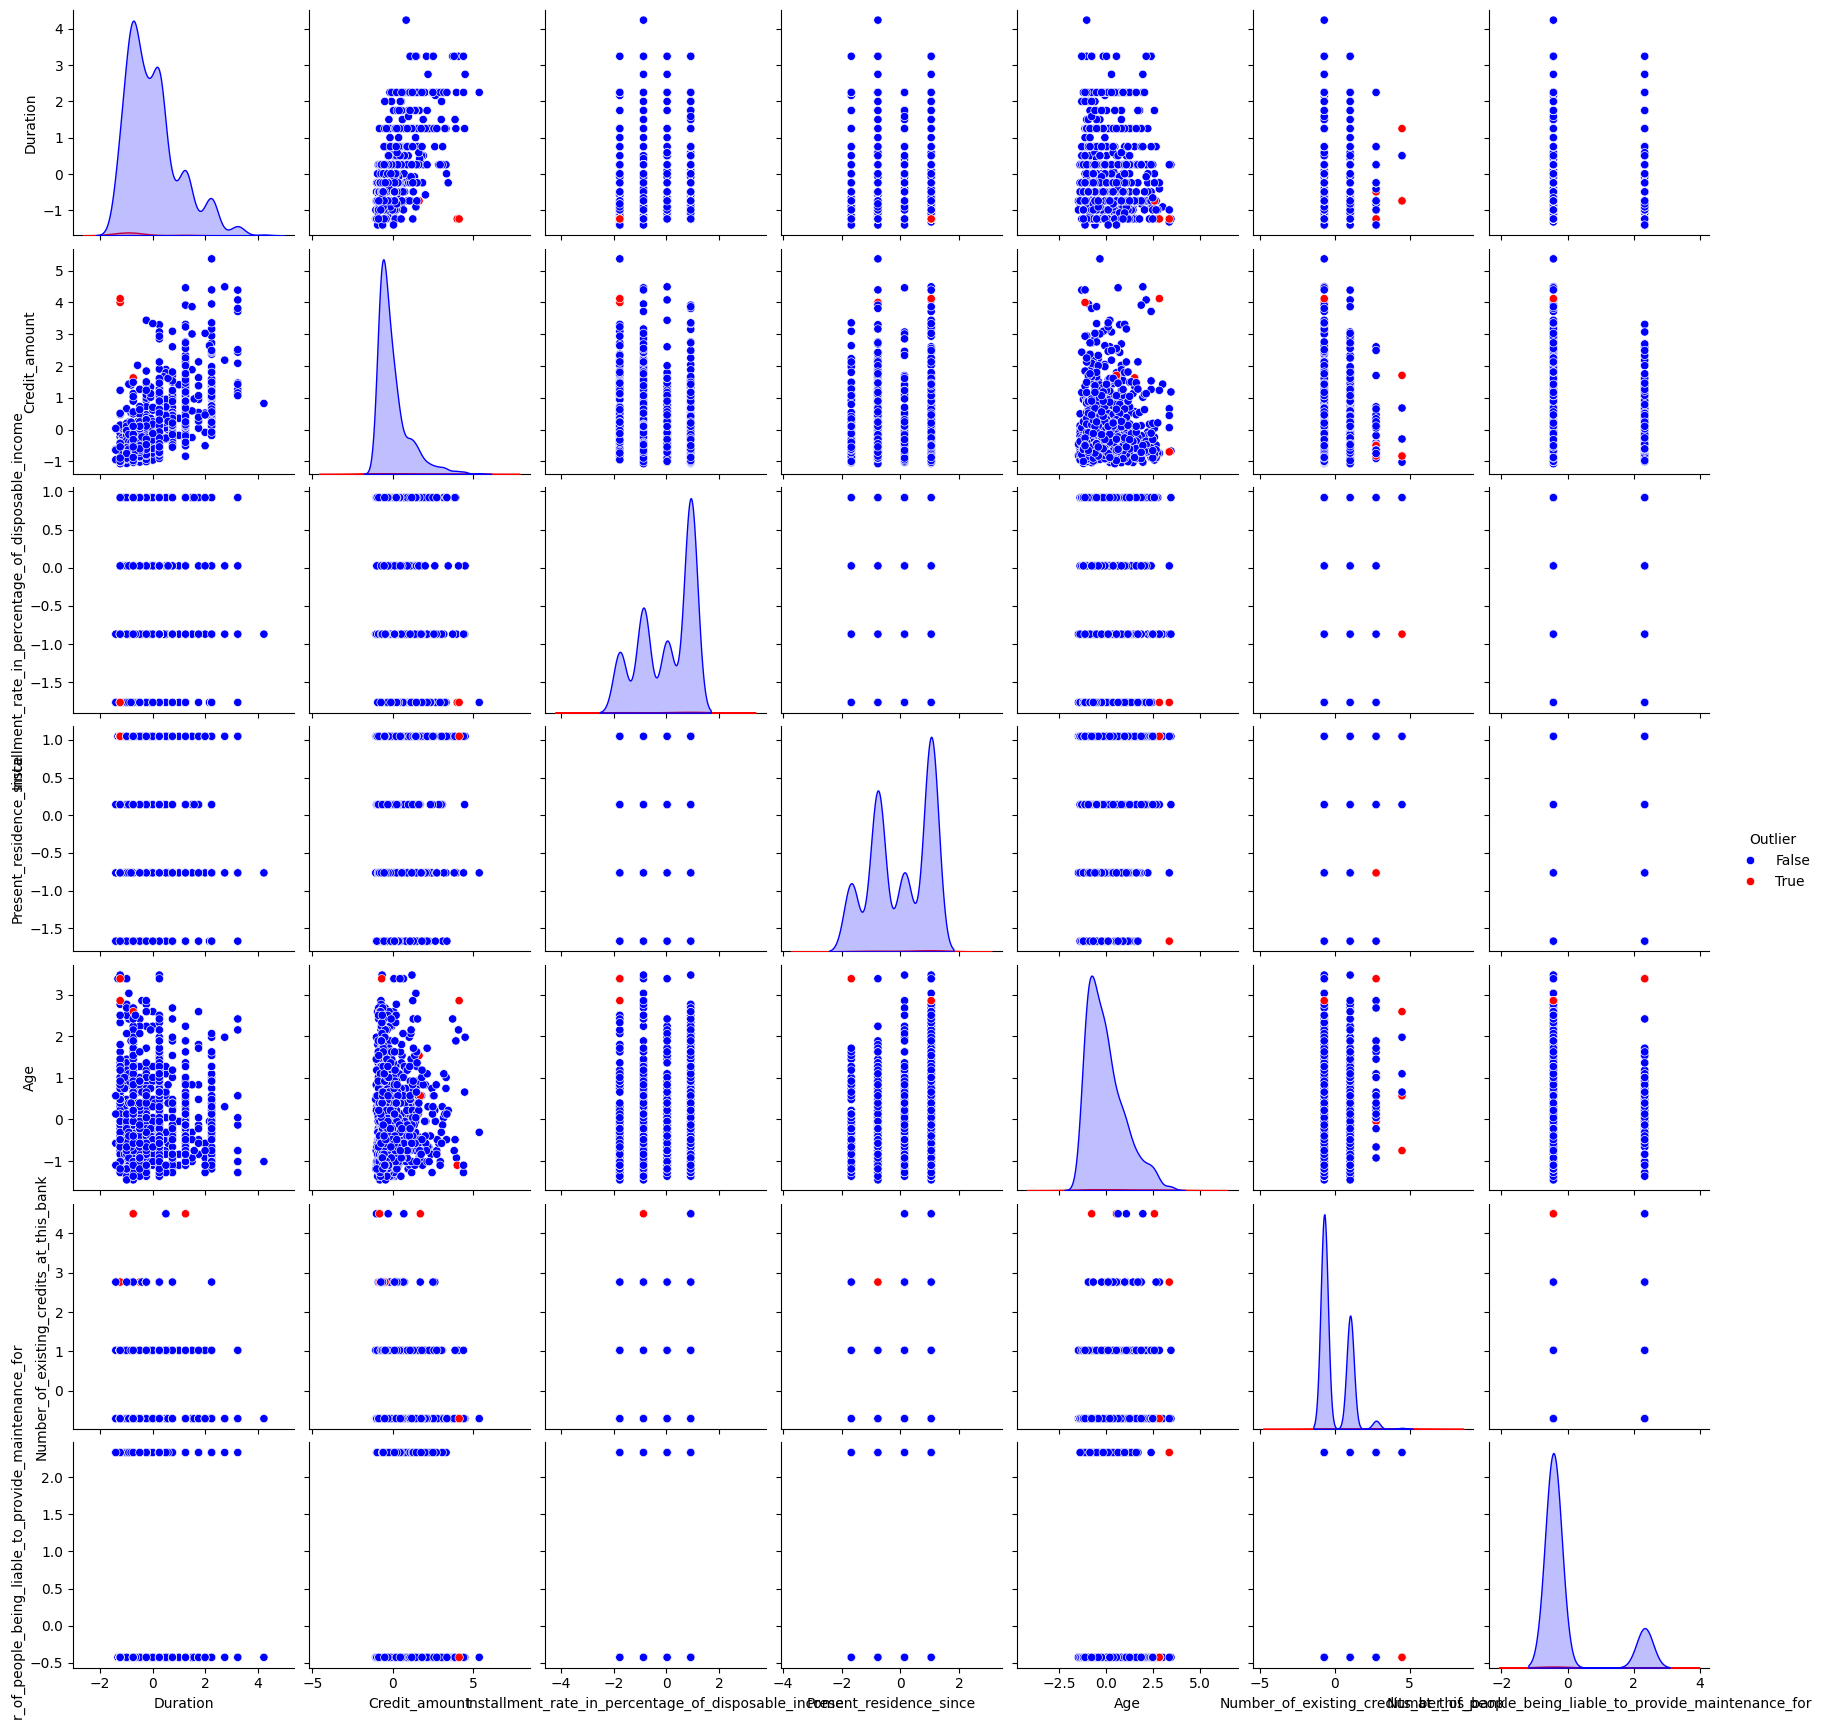

In [90]:
# Imprimir los tipos de datos
print("Tipos de datos en el DataFrame:")
#print(df.dtypes)

# Seleccionar columnas numéricas (solo int64 en este caso)

# Estandarizar los datos numéricos
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numerical_cols])

# Convertir los datos escalados en un DataFrame para facilitar el manejo
scaled_df = pd.DataFrame(scaled_values, columns=numerical_cols)

# Verificar los datos estandarizados
print("Primeras filas del DataFrame estandarizado:")
print(scaled_df.head())

# Configurar y ajustar LOF
local_outlier_factor = LocalOutlierFactor(n_neighbors=20)  # Número de vecinos
result = local_outlier_factor.fit_predict(scaled_df.values)

# Identificar outliers y puntos normales
outliers = result == -1
no_outliers = result == 1

# Ver número de outliers detectados
print(f"Número de outliers detectados: {outliers.sum()}")

# Llamar a la función de visualización
plot_outliers(scaled_df, outliers)

Observamos que ahora hay más outliers con el mismo numero de vecinos y estan distribuidos.  
Aún así podemos ver como estos valores tampoco se alejan exageradamente de la resta, como hemos dicho nosotros no consideraremos **de momento** que haya outliers.

### Posible eliminación de variables irrelevantes o redundantes (selección de características)

A continuación, observamos las correlaciones entre todas las variables, para identificar posibles candidatas a ser eliminadas.

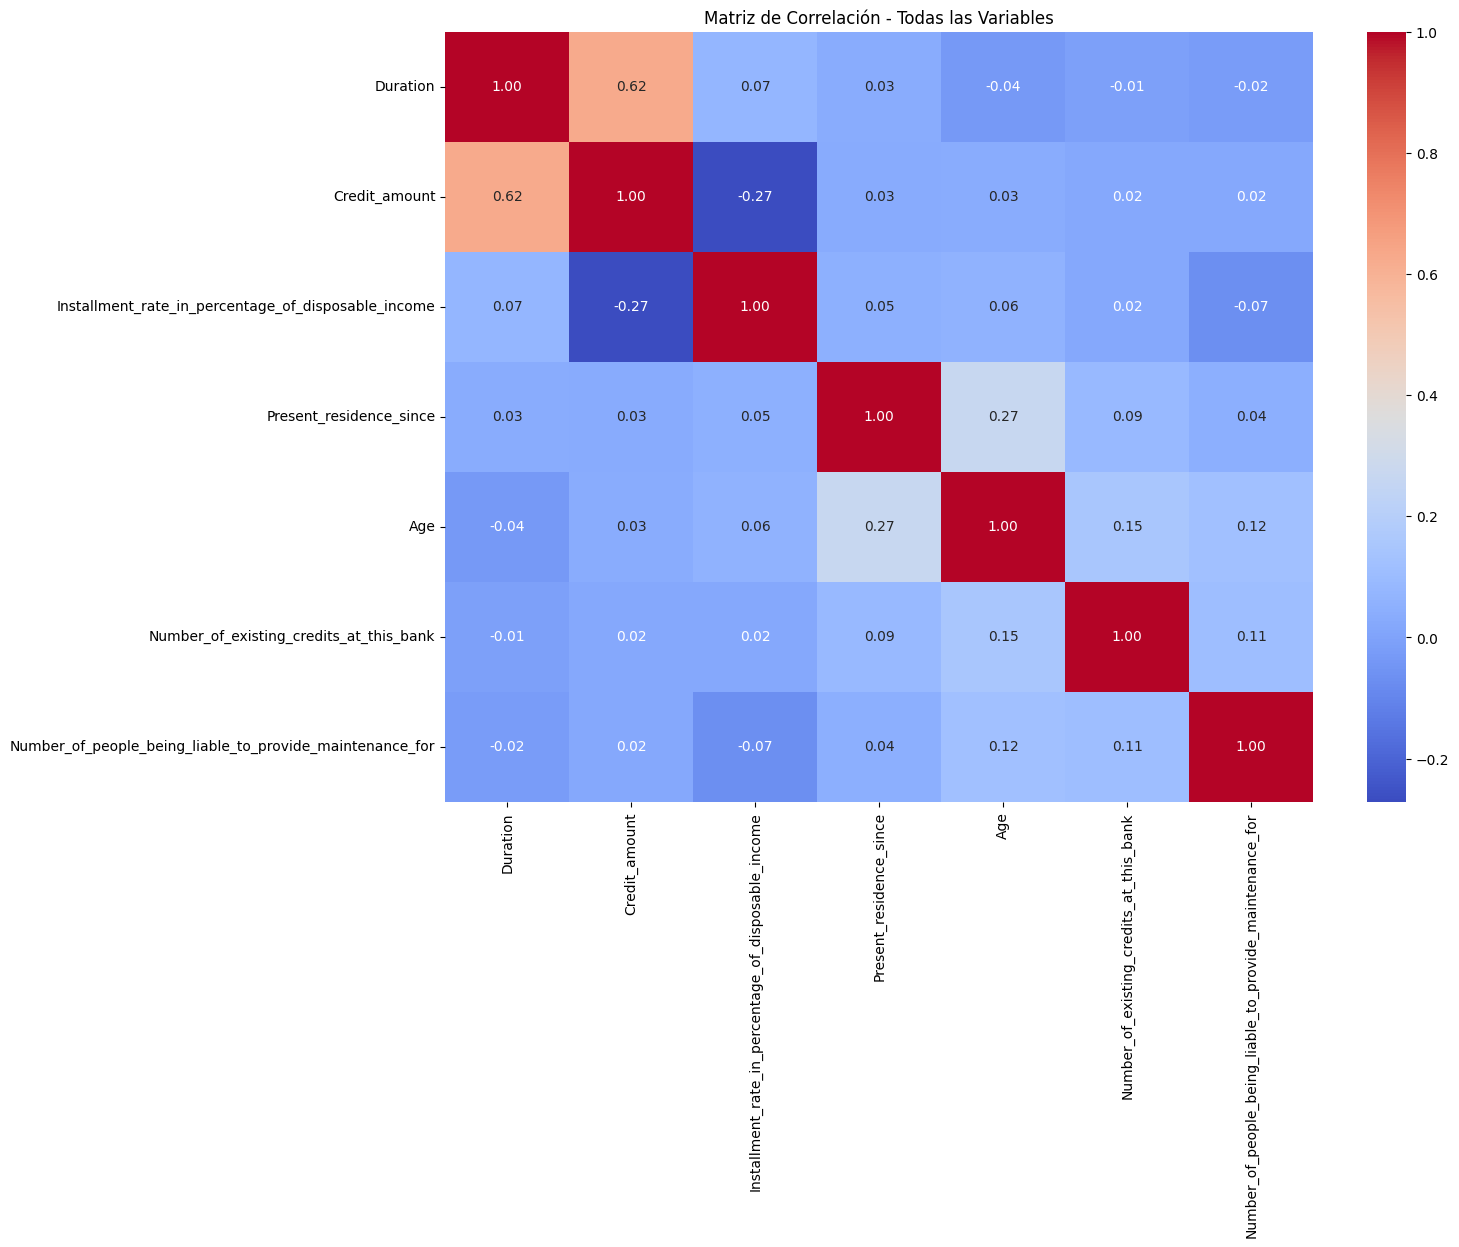

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


# Verificar si hay variables numéricas
if len(numerical_cols) == 0:
    print("No hay columnas numéricas válidas para generar un mapa de calor.")
else:
    # Calcular la matriz de correlación para todas las variables numéricas
    combined_corr_matrix = df[numerical_cols].corr()

    # Visualizar el mapa de calor
    plt.figure(figsize=(14, 10))
    sns.heatmap(
        combined_corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        cbar=True
    )
    plt.title('Matriz de Correlación - Todas las Variables')
    plt.show()


El análisis del mapa de calor muestra que las correlaciones entre las variables son moderadas, con valores entre 0.62 y -0.32, y no se observan relaciones extremadamente altas que indiquen redundancia. Aunque algunas variables tienen correlaciones muy bajas con la variable objetivo, esto por sí solo no es suficiente para justificar su eliminación, ya que podrían aportar información relevante en combinación con otras variables. Por lo tanto, de momento no eliminaremos ninguna variable y procederemos con el preprocesamiento completo antes de tomar decisiones adicionales.

### Creación de nuevas variables que puedan ser útiles (extracción de características)

En este caso, considerando las variables disponibles, no se considera necesario crear nuevas características en este momento. Las variables ya proporcionan información clara y bien definida, como duración del crédito, historial crediticio, cantidad del crédito, edad, y otras que capturan distintos aspectos relevantes del problema.

## Método de Remuestreo 

Antes de la normalización haremos el remuestreo de los datos ya que el procedimiento correcto es dividir el conjunto en entramiento y test y aplicar solo el escalado a los datos de entrenamiento (fit_transform), y despues con el escalador ajustado a los datos de entrenamiento, escalar los de test.

Separamos las características y la variable objetivo, dividiendo el conjunto en entrenamiento (80%) y prueba (20%) de forma estratificada por lo que hemos comentado anteriormente después de observar las gráficas (que ahora afirmaremos en este apartado con y.value_counts()). stratify=y en train_test_split asegura que la proporción entre las clases de la variable objetivo se conserve en los conjuntos de entrenamiento y prueba. Esto es especialmente útil cuando las clases están desbalanceadas, que es nuestro caso, para garantizar que ambas particiones tengan representaciones proporcionales de todas las clases.  

 Utilizamos validación cruzada con 5 pliegues para evaluar el modelo de manera robusta.

In [92]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('class', axis=1)  
y = df['class']

print("Distribución de las etiquetas en el conjunto original:")
print(y.value_counts(), "\n")

# Dividir los datos en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random, stratify=y
)

# Configurar la validación cruzada estratificada con 5 pliegues (SE UTILIZARA PARA LOS MODELOS)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random)

# Imprimir las dimensiones de los conjuntos
print("Dimensiones de los conjuntos:\n")
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
print("\n")
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Contar las instancias de cada etiqueta en y_test
print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts())
X_train[:2]

Distribución de las etiquetas en el conjunto original:
class
1    700
2    300
Name: count, dtype: int64 

Dimensiones de los conjuntos:

Conjunto de entrenamiento: (800, 20)
Conjunto de prueba: (200, 20)


Distribución en el conjunto de entrenamiento:
class
1    560
2    240
Name: count, dtype: int64

Distribución en el conjunto de prueba:
class
1    140
2     60
Name: count, dtype: int64


,Status_of_existing_checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_/_guarantors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker
882,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),2181,unknown/ no savings account,... >= 7 years,4,male: single,none,4,real estate,36,none,own,2,skilled employee / official,1,none,yes
719,0 <= ... < 200 DM,20,no credits taken/ all credits paid back duly,car (used),6148,100 <= ... < 500 DM,... >= 7 years,3,male: married/widowed,none,4,car or other,31,bank,own,2,skilled employee / official,1,"yes, registered under the customer's name",yes


### Normalización de la variables (e.g. estandarización) y Codificación de variables no continuas o no ordenadas

En nuestro conjunto de datos hace falta cambiar los valores de las variables categóricas de strings a numeros:
Utilizaremos Target Encoder ya que estas variables categóricas no tienen sus clases en un representan ordinal y hay demasiadas y con demasiadas clases para hacer One-Hot Encoding.

La normalización de las variables es un paso clave en el preprocesamiento, especialmente para modelos que son sensibles a las escalas de los datos. Este proceso garantiza que todas las variables numéricas tengan una escala comparable, evitando que aquellas con rangos más grandes dominen el análisis. En este caso, se realizará la estandarización, transformando las variables numéricas para que tengan una media de 0 y una desviación estándar de 1. Esto facilita la convergencia de los modelos y mejora la interpretabilidad de los resultados.



In [95]:
# Identificar las columnas por tipo
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Escalar variables numéricas
        ('cat', TargetEncoder(), cat_features)   # Codificar variables categóricas
    ]
)

# Crear el pipeline completo
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)  # `y_train` se usa solo para TargetEncoder, no para escalar

# Transformar los datos de entrenamiento y prueba
X_train_transformed = pipeline.transform(X_train) #!!! Este es el que se usara para entrenar el modelo
X_test_transformed = pipeline.transform(X_test) #!!! Este es el que se usara para evaluar el modelo

# Reconstruir las columnas en el orden original
column_names = X_train.columns 

# Convertir a DataFrame SOLO PARA VISUALIZAR
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=column_names, index=X_train.index) 

display(X_train[:2])

display(X_train_transformed_df.head(2))

print(X_train_transformed_df.dtypes)



,Status_of_existing_checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_/_guarantors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker
882,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),2181,unknown/ no savings account,... >= 7 years,4,male: single,none,4,real estate,36,none,own,2,skilled employee / official,1,none,yes
719,0 <= ... < 200 DM,20,no credits taken/ all credits paid back duly,car (used),6148,100 <= ... < 500 DM,... >= 7 years,3,male: married/widowed,none,4,car or other,31,bank,own,2,skilled employee / official,1,"yes, registered under the customer's name",yes


,Status_of_existing_checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_/_guarantors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker
882,0.754215,-0.379305,0.925948,1.045269,0.021988,1.01522,-0.444528,1.403846,1.158120,1.389744,1.180556,1.251208,1.264574,1.295486,1.205479,1.269171,1.265165,1.299603,1.319239,1.306096
719,-0.089898,1.060270,0.032391,1.045269,-0.413415,1.01522,-0.444528,1.403846,1.520254,1.148488,1.329209,1.251208,1.277900,1.295486,1.302583,1.413218,1.265165,1.299603,1.272171,1.306096


Status_of_existing_checking_account                         float64
Duration                                                    float64
Credit_history                                              float64
Purpose                                                     float64
Credit_amount                                               float64
Savings_account/bonds                                       float64
Present_employment_since                                    float64
Installment_rate_in_percentage_of_disposable_income         float64
Personal_status_and_sex                                     float64
Other_debtors_/_guarantors                                  float64
Present_residence_since                                     float64
Property                                                    float64
Age                                                         float64
Other_installment_plans                                     float64
Housing                                         

### Transformación de las variables (e.g. corrección de asimetrías graves y/o curtosis en los valores de los datos)

Para mejorar la calidad de nuestros datos, aplicaremos transformaciones a las variables numéricas con distribuciones altamente asimétricas o curtosis extrema. Estas transformaciones buscan acercar las distribuciones a una forma más normal, lo que es especialmente útil para algoritmos sensibles a estas características.

In [ ]:
"""
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Calcular asimetría y curtosis de las columnas numéricas (excluyendo 'class')
for col in numerical_cols:
    if col == 'class':
        continue  # Saltar la variable objetivo

    skewness = skew(df[col])
    curt = kurtosis(df[col])
    print(f"{col}: Asimetría = {skewness:.2f}, Curtosis = {curt:.2f}")

    # Aplicar transformación solo si la asimetría es significativa (e.g., |skewness| > 1)
    if abs(skewness) > 1:
        print(f"Aplicando transformación a {col}...")
        if (df[col] > 0).all():  # Asegurarse de que no haya valores <= 0 (para log)
            df[col] = np.log1p(df[col])  # Transformación logarítmica
        else:
            transformer = PowerTransformer(method='yeo-johnson', standardize=False)
            df[col] = transformer.fit_transform(df[col].values.reshape(-1, 1))

# Verificar nuevamente las distribuciones
for col in numerical_cols:
    if col == 'class':
        continue  # Saltar la variable objetivo

    skewness = skew(df[col])
    curt = kurtosis(df[col])
    print(f"{col} después de la transformación: Asimetría = {skewness:.2f}, Curtosis = {curt:.2f}")
"""

Status_of_existing_checking_account: Asimetría = -0.03, Curtosis = -1.13
Duration: Asimetría = 1.09, Curtosis = 0.91
Aplicando transformación a Duration...
Credit_history: Asimetría = 1.41, Curtosis = 2.05
Aplicando transformación a Credit_history...
Purpose: Asimetría = 0.64, Curtosis = 0.22
Credit_amount: Asimetría = 1.95, Curtosis = 4.27
Aplicando transformación a Credit_amount...
Savings_account/bonds: Asimetría = 1.32, Curtosis = 0.96
Aplicando transformación a Savings_account/bonds...
Present_employment_since: Asimetría = 0.63, Curtosis = -0.83
Installment_rate_in_percentage_of_disposable_income: Asimetría = -0.53, Curtosis = -1.21
Personal_status_and_sex: Asimetría = 1.34, Curtosis = 0.87
Aplicando transformación a Personal_status_and_sex...
Other_debtors_/_guarantors: Asimetría = 3.38, Curtosis = 10.43
Aplicando transformación a Other_debtors_/_guarantors...
Present_residence_since: Asimetría = -0.27, Curtosis = -1.38
Property: Asimetría = -0.00, Curtosis = -1.57
Age: Asimetría

Tras aplicar las transformaciones a diversas variables, las distribuciones de las variables han mostrado una reducción significativa en asimetría y curtosis, logrando una mayor simetría en la mayoría de los casos.











## PCA

Para reducir la dimensionalidad de nuestros datos y facilitar su análisis, hemos aplicado un Análisis de Componentes Principales (PCA). Este método transforma las variables originales en un conjunto de componentes principales que explican la mayor cantidad de varianza posible en los datos. El objetivo es capturar al menos el 95% de la varianza total con el menor número de componentes principales, asegurando que la mayor parte de la información relevante se conserve mientras reducimos la complejidad del modelo.

Varianza explicada por cada componente principal:
[0.5041424 0.4774805]
El número de componentes seleccionados para explicar el 95% de la varianza es: 2


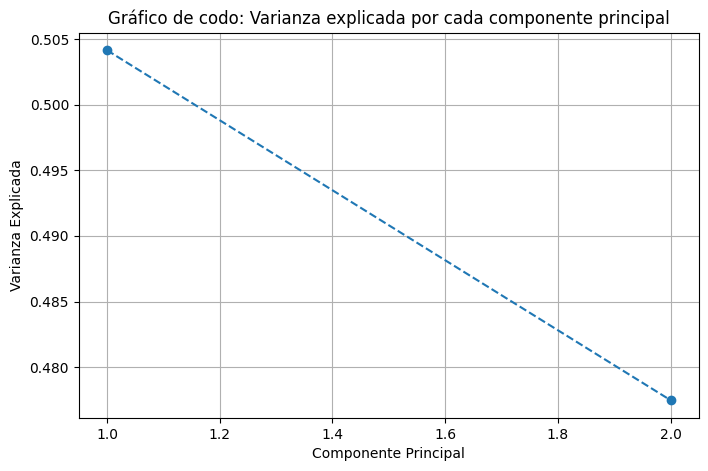

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inicializar el PCA para capturar el 95% de la varianza
pca = PCA(n_components=0.95)

#numerical_cols2 = X_train_transformed_df.select_dtypes(include=['int64', 'float64'])

#print(numerical_cols2.columns)
#print(numerical_cols)

# Aplicar PCA a las variables numéricas ya estandarizadas
pca_transformed = pca.fit_transform(X_train_transformed_df[numerical_cols]) 

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Imprimir el porcentaje de varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Imprimir el número de componentes seleccionados
print(f"El número de componentes seleccionados para explicar el 95% de la varianza es: {pca.n_components_}")

# Visualización: Gráfico de codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Gráfico de codo: Varianza explicada por cada componente principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid()
plt.show()


Tras aplicar el PCA, hemos identificado 16 componentes principales que explican el 95% de la varianza en los datos. Cada componente principal representa una combinación lineal de las variables originales, ordenadas por su capacidad de explicar la variabilidad en los datos. Los valores de varianza explicada por componente muestran que las primeras componentes contribuyen más significativamente, mientras que las últimas tienen menor impacto, lo que tiene sentido. Además el análisis PCA revela que la variabilidad de la variable objetivo está explicada por un conjunto amplio de variables, en lugar de estar dominada por unas pocas. Esto sugiere que la relación entre las variables predictoras y la variable objetivo es multifacética, y que la información relevante está distribuida en varias dimensiones del espacio de datos.

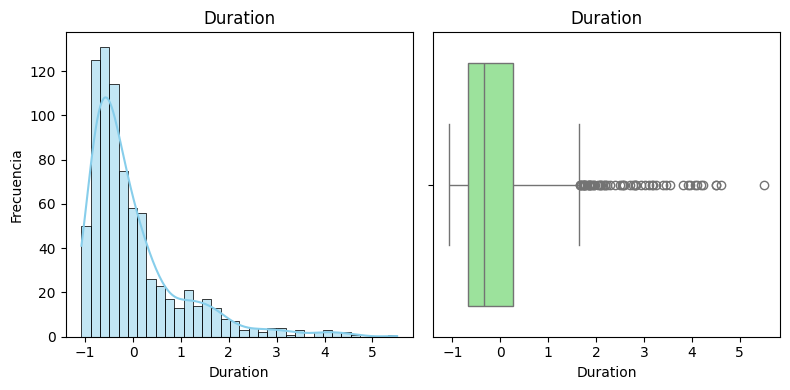

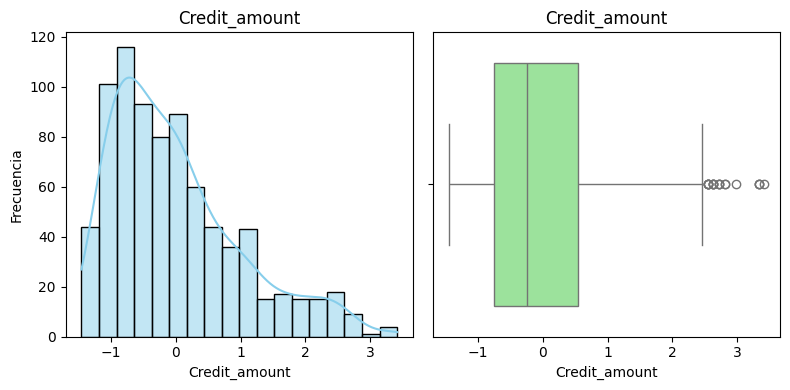

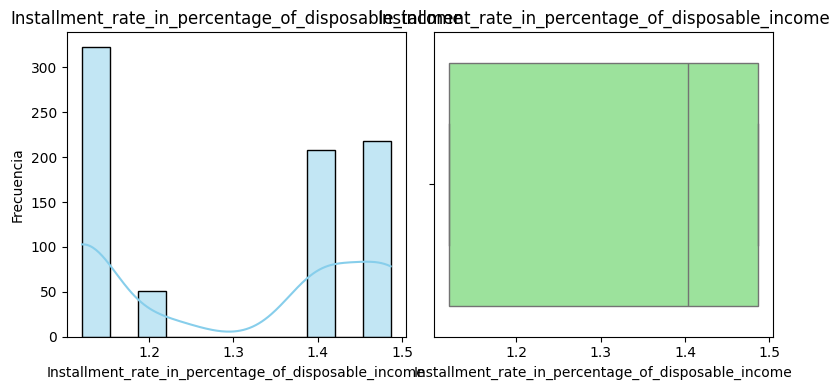

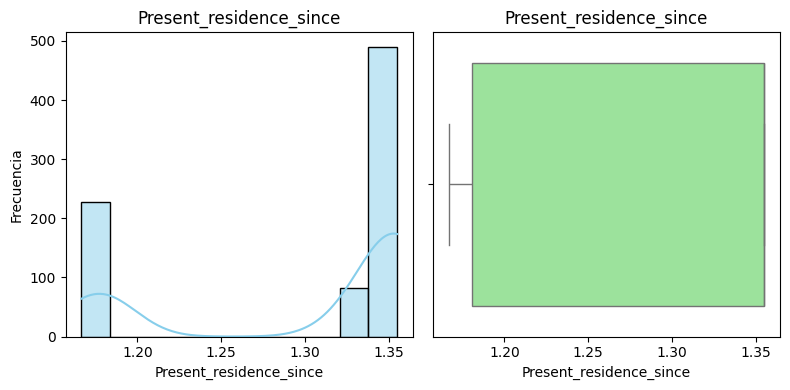

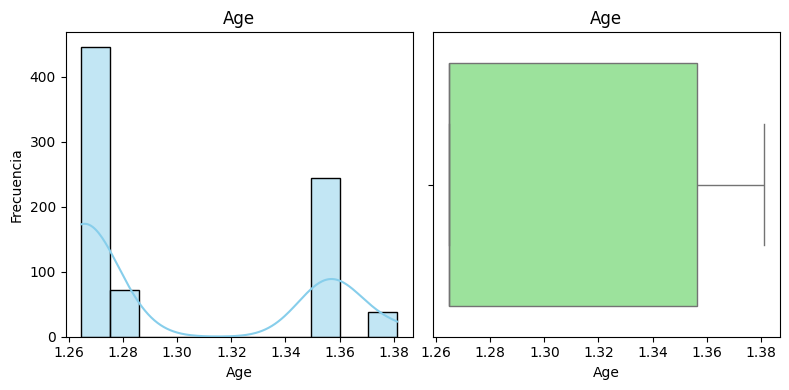

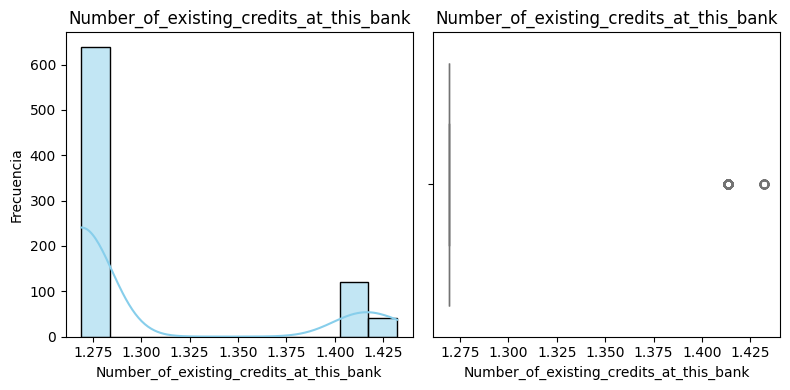

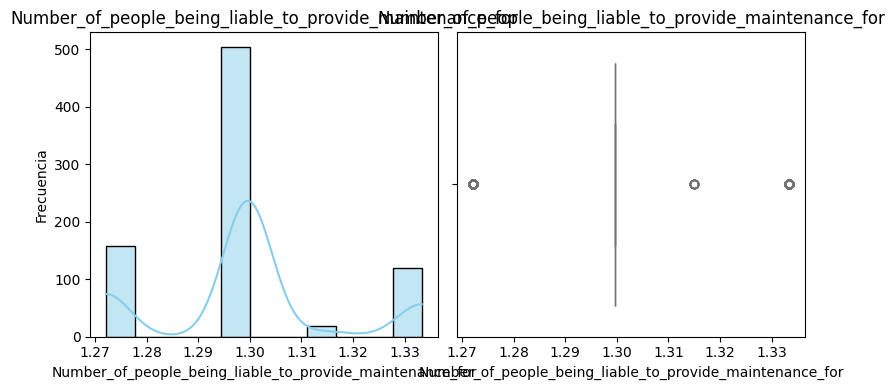

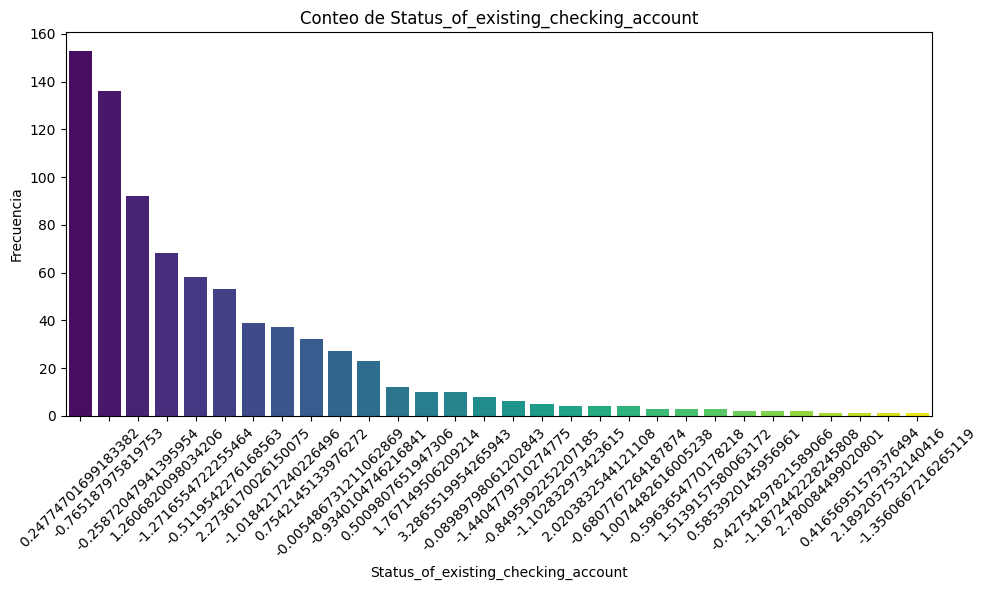

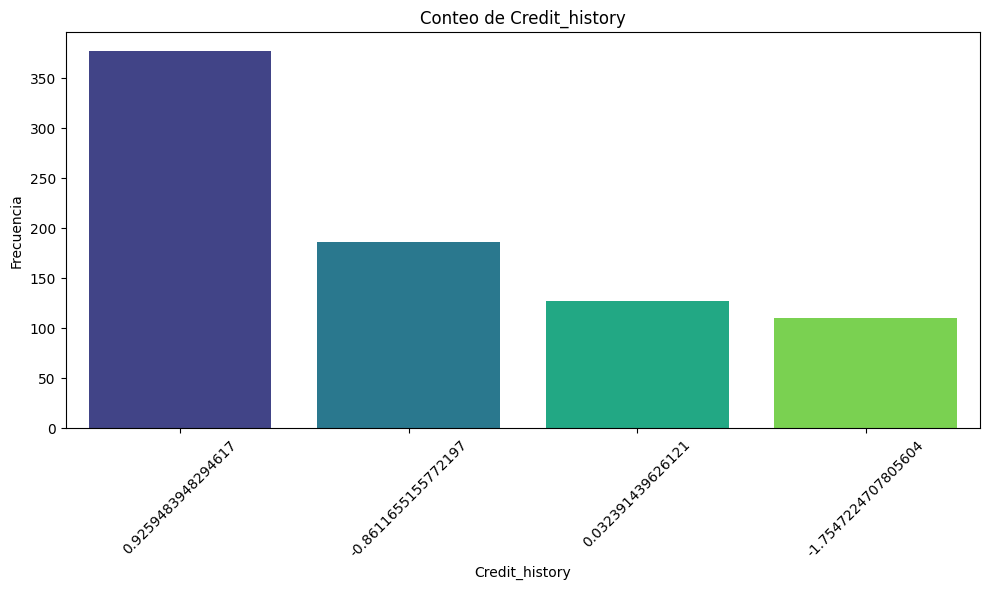

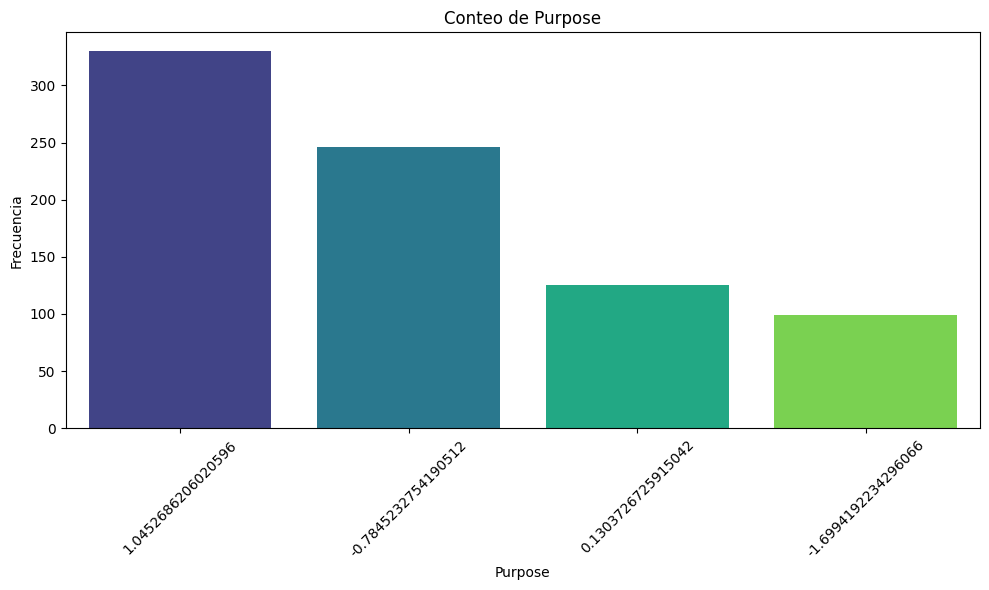

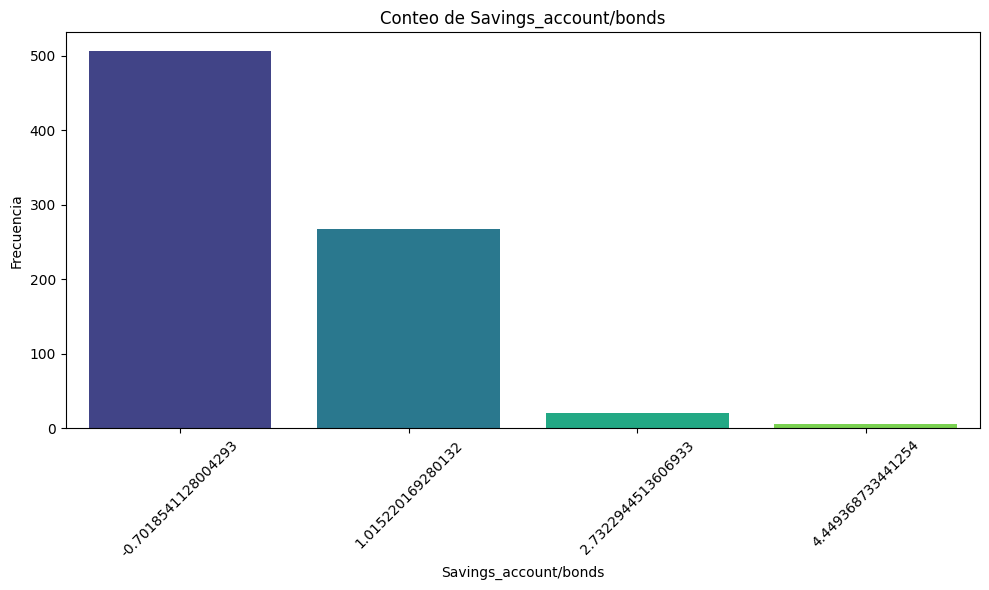

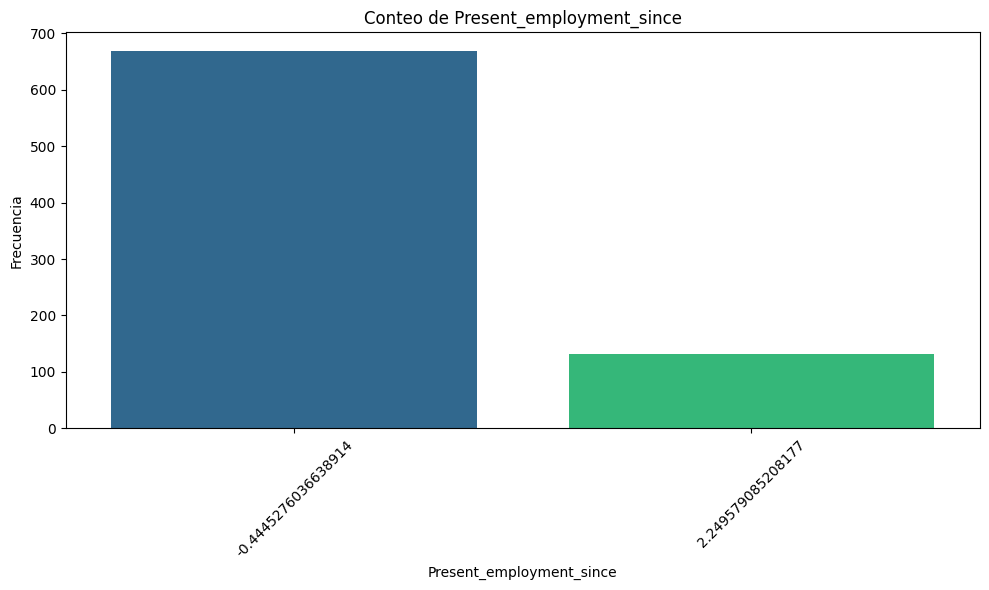

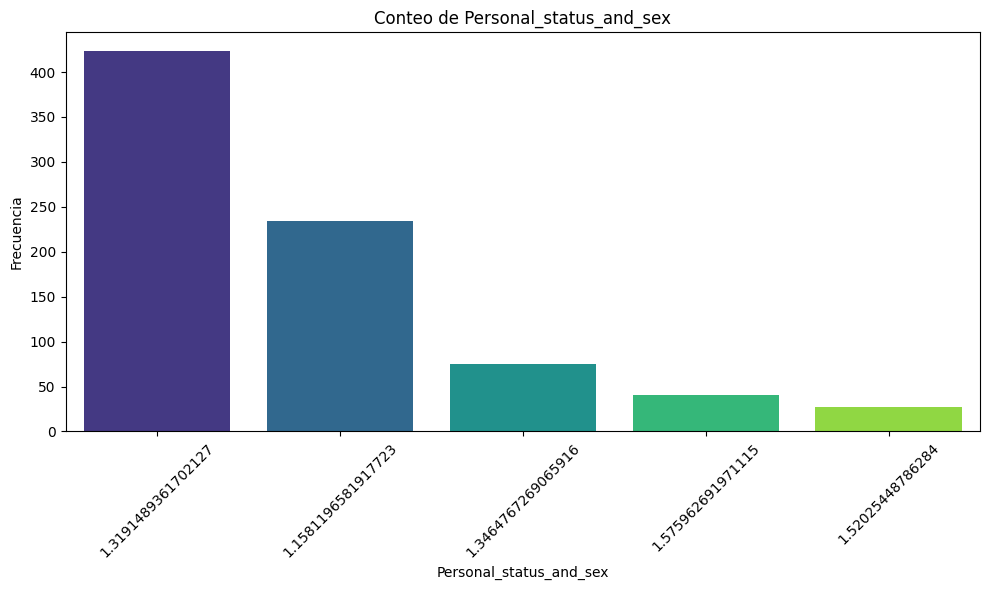

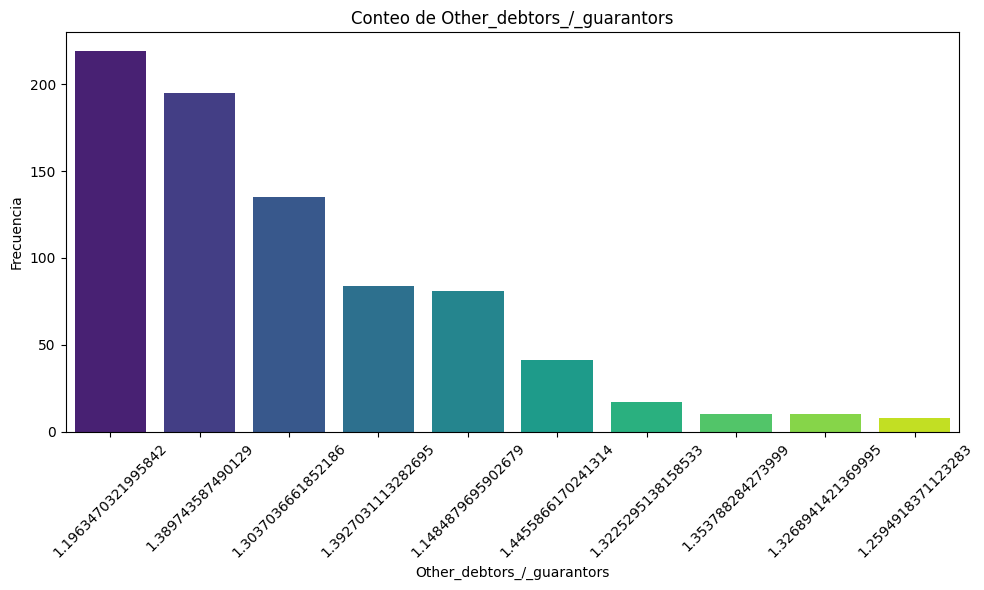

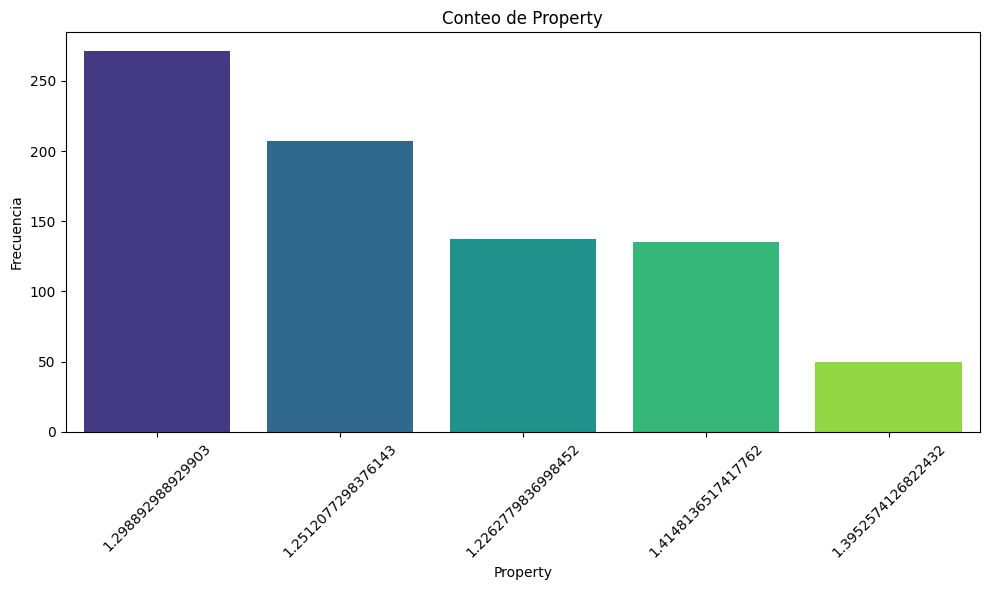

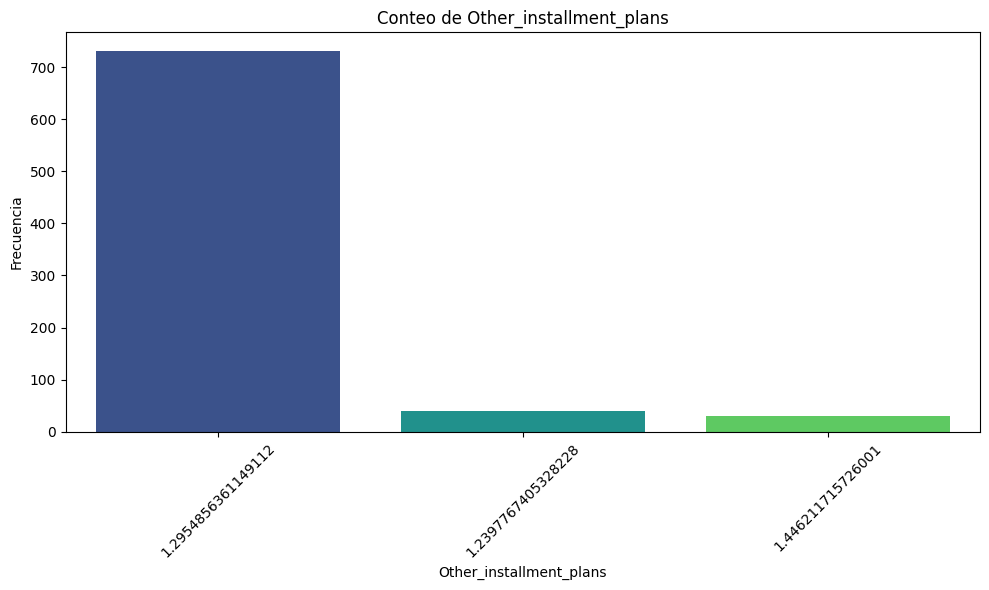

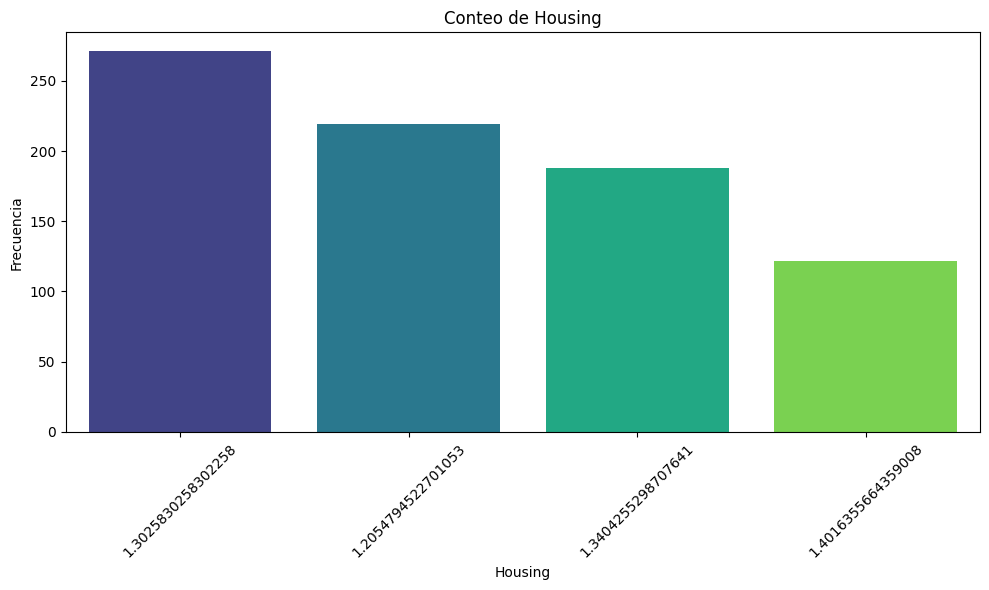

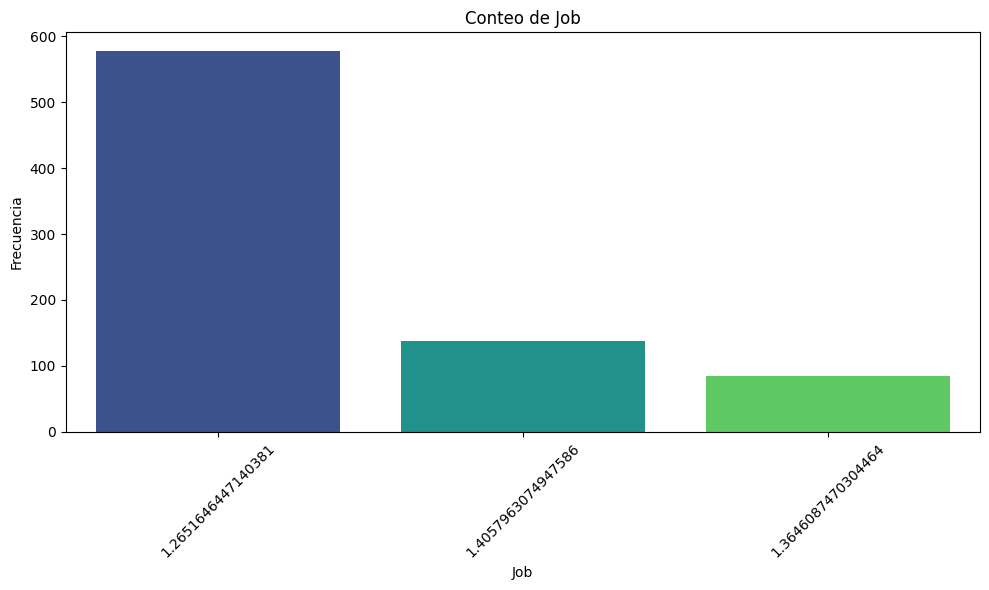

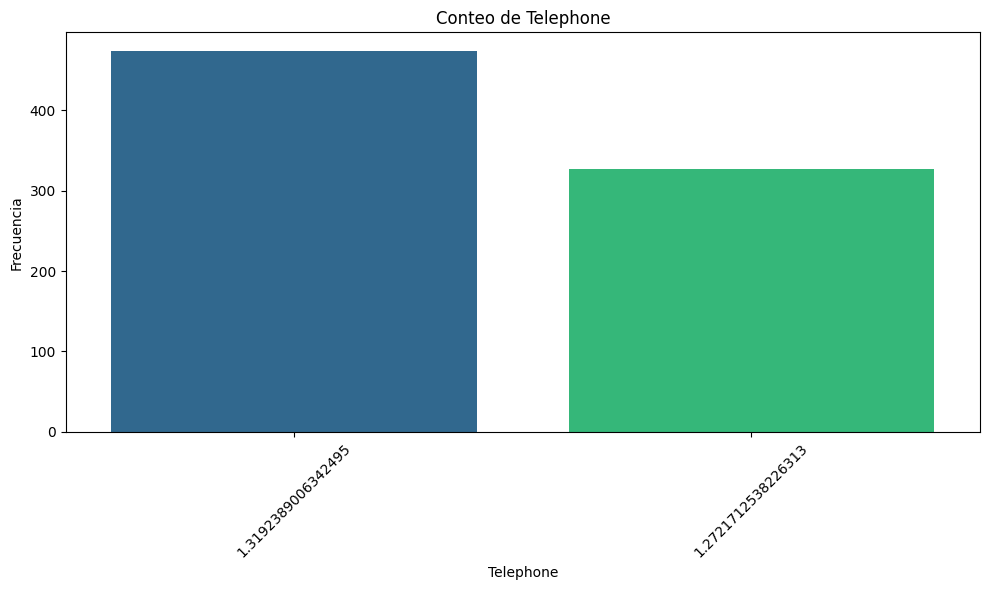

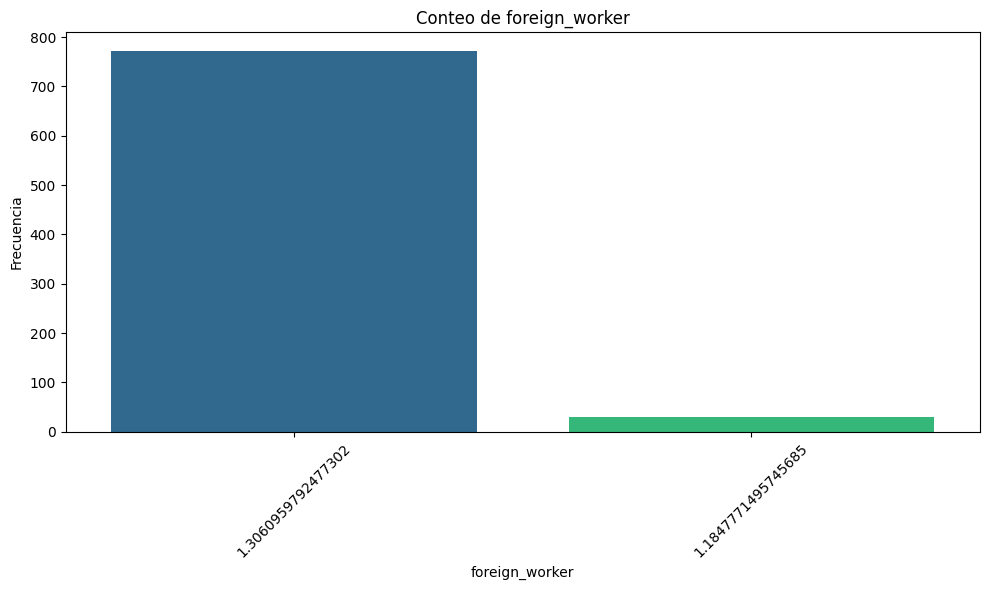

In [ ]:
visualize_numerical(X_train_transformed_df, numerical_cols)
visualize_categorical(X_train_transformed_df, categorical_cols)

# Métodos lineales/cuadráticos

## Regresión logística

Ajustando hiperparámetros para Regresión Logística...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores hiperparámetros para Regresión Logística: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy promedio en validación cruzada: 0.7463

Regresión Logística:
Accuracy en el conjunto de prueba: 0.7350
F1-Score: 0.4854
AUC-ROC: 0.7514

Matriz de confusión:
[[122  18]
 [ 35  25]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       140
           2       0.58      0.42      0.49        60

    accuracy                           0.73       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.72      0.73      0.72       200



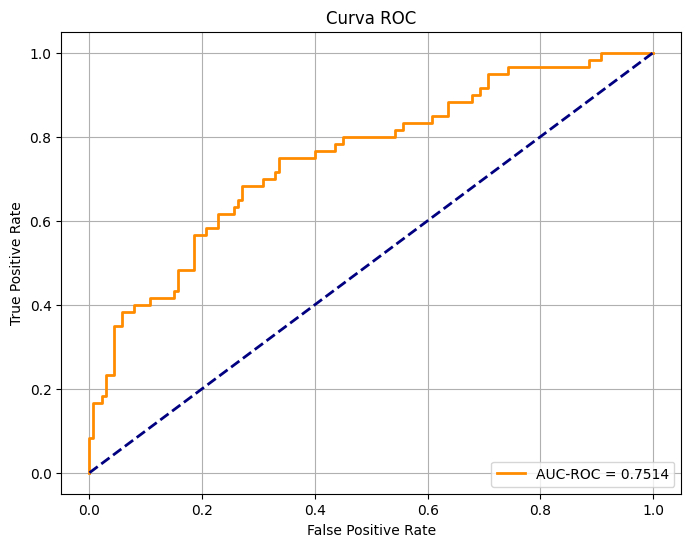

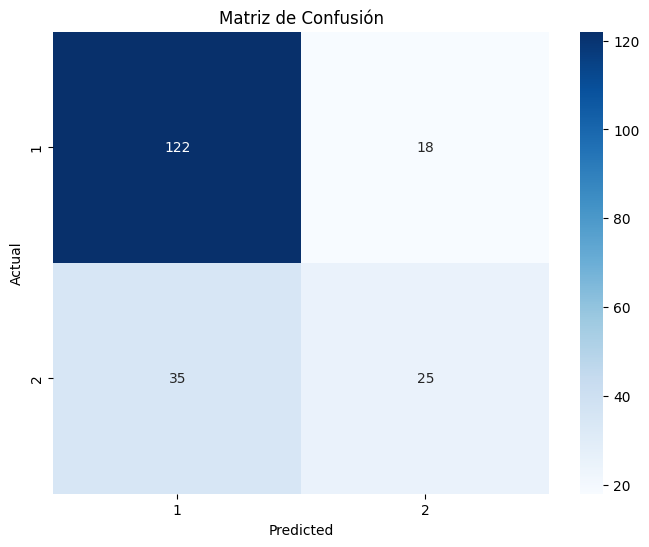

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    f1_score
)

# Configuración de hiperparámetros para la Regresión Logística
param_grid_lr = [
    {
        "penalty": ["l2"],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs"],
        "max_iter": [500, 1000],
    },
    {
        "penalty": ["l1"],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "saga"],
        "max_iter": [500, 1000],
    },
    {
        "penalty": ["elasticnet"],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["saga"],
        "l1_ratio": [0.5],
        "max_iter": [500, 1000],
    },
]

# Búsqueda en malla para Regresión Logística
print("Ajustando hiperparámetros para Regresión Logística...")
model_lr = LogisticRegression()
grid_search_lr = GridSearchCV(
    model_lr, param_grid_lr, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1
)
grid_search_lr.fit(X_train, y_train)

# Mejor modelo y evaluación
best_lr = grid_search_lr.best_estimator_
print(f"Mejores hiperparámetros para Regresión Logística: {grid_search_lr.best_params_}")
print(f"Accuracy promedio en validación cruzada: {grid_search_lr.best_score_:.4f}")

# Evaluación en el conjunto de prueba
y_pred_lr = best_lr.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, pos_label=2)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nRegresión Logística:")
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr))

# Visualización de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC-ROC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()


El modelo de Regresión Logística, optimizado con los mejores hiperparámetros, obtuvo un accuracy del 73.50 % en el conjunto de prueba, lo que indica un desempeño global moderado. Sin embargo, el análisis por clase revela una notable disparidad en el rendimiento. La clase mayoritaria (1) tiene un recall del 87 % y un F1-Score de 0.82, lo que demuestra que el modelo identifica con alta precisión a los clientes que no deberían recibir un préstamo. Por otro lado, la clase minoritaria (2) presenta un recall del 42 % y un F1-Score de 0.49, reflejando dificultades para clasificar correctamente a los clientes que deberían recibir un préstamo.

El AUC-ROC de 0.7514 sugiere que el modelo tiene una capacidad moderada para distinguir entre ambas clases, aunque persisten problemas en la identificación de la clase minoritaria. La matriz de confusión confirma que 35 clientes de la clase 2 fueron clasificados incorrectamente como no aptos (falsos negativos), mientras que 18 clientes de la clase 1 fueron clasificados erróneamente como aptos (falsos positivos).

## LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Ajustar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_lda = lda.predict(X_test)
y_proba_lda = lda.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

# Evaluación del modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = classification_report(y_test, y_pred_lda, output_dict=True)["2"]["f1-score"]
auc_roc_lda = roc_auc_score(y_test, y_proba_lda)

# Imprimir resultados
print("Linear Discriminant Analysis (LDA):")
print(f"Accuracy: {accuracy_lda:.4f}")
print(f"F1-Score: {f1_lda:.4f}")
print(f"AUC-ROC: {auc_roc_lda:.4f}")
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_lda))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lda))


Linear Discriminant Analysis (LDA):
Accuracy: 0.7250
F1-Score: 0.4762
AUC-ROC: 0.7492

Matriz de confusión:
[[120  20]
 [ 35  25]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.77      0.86      0.81       140
           2       0.56      0.42      0.48        60

    accuracy                           0.72       200
   macro avg       0.66      0.64      0.64       200
weighted avg       0.71      0.72      0.71       200



El modelo de Análisis Discriminante Lineal (LDA) alcanzó un accuracy de 72.50 %, un resultado ligeramente inferior al de la Regresión Logística. Similarmente, el modelo muestra un desempeño desigual entre las clases. Para la clase mayoritaria (1), el recall fue del 86 %, mientras que para la clase minoritaria (2), este valor fue de solo 42 %. Esto se traduce en un F1-Score de 0.81 para la clase 1 y de 0.48 para la clase 2.

El AUC-ROC de 0.7492 es comparable al de la Regresión Logística, lo que indica que el modelo también tiene una capacidad moderada para distinguir entre ambas clases. La matriz de confusión revela que el modelo clasificó incorrectamente a 35 clientes de la clase 2 como no aptos (falsos negativos) y a 20 clientes de la clase 1 como aptos (falsos positivos). Estos resultados sugieren que LDA, al igual que la Regresión Logística, enfrenta desafíos significativos para identificar correctamente la clase minoritaria, probablemente debido a su enfoque lineal y el desbalance en los datos.

## QDA


Quadratic Discriminant Analysis (QDA):
Accuracy en el conjunto de prueba: 0.6450
F1-Score: 0.5035
AUC-ROC: 0.7248

Matriz de confusión:
[[93 47]
 [24 36]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.79      0.66      0.72       140
           2       0.43      0.60      0.50        60

    accuracy                           0.65       200
   macro avg       0.61      0.63      0.61       200
weighted avg       0.69      0.65      0.66       200



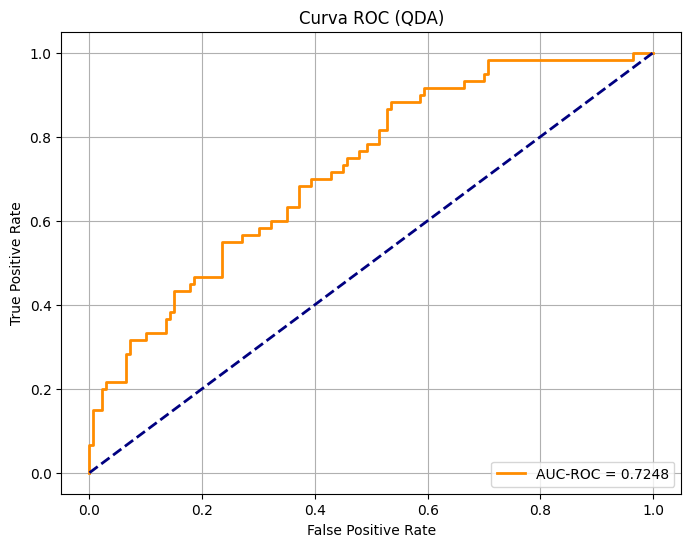

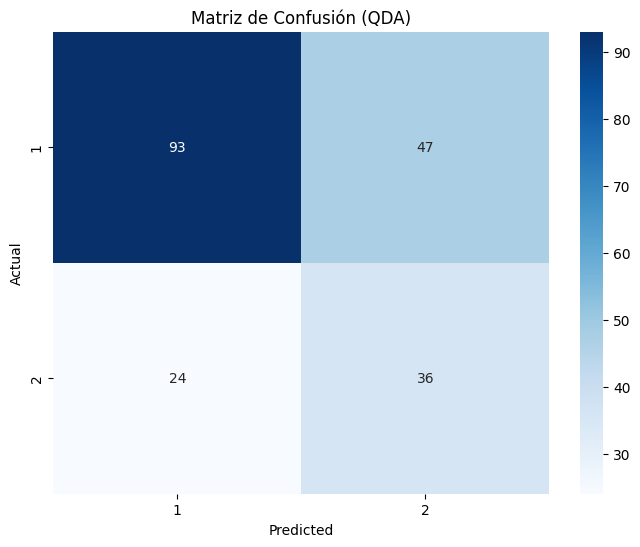

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_qda = qda.predict(X_test)
y_pred_prob_qda = qda.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular métricas
accuracy_qda = accuracy_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda, pos_label=2)
roc_auc_qda = roc_auc_score(y_test, y_pred_prob_qda)

print("\nQuadratic Discriminant Analysis (QDA):")
print(f"Accuracy en el conjunto de prueba: {accuracy_qda:.4f}")
print(f"F1-Score: {f1_qda:.4f}")
print(f"AUC-ROC: {roc_auc_qda:.4f}")

# Matriz de confusión
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("\nMatriz de confusión:")
print(conf_matrix_qda)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_qda))

# Visualización de la curva ROC
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_pred_prob_qda, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_qda, tpr_qda, color="darkorange", lw=2, label=f"AUC-ROC = {roc_auc_qda:.4f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC (QDA)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_qda, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión (QDA)")
plt.show()


El modelo de Análisis Discriminante Cuadrático (QDA) mostró un accuracy del 68.50 %, lo que lo coloca por debajo de los modelos de RL y LDA en términos de desempeño global. Sin embargo, se destaca en el manejo de la clase minoritaria (2), logrando un recall del 58 %, superior al de los otros modelos. Esto sugiere que QDA es más eficaz para identificar correctamente a los clientes que deberían recibir un préstamo, aunque lo hace a costa de una mayor tasa de falsos positivos, como se refleja en su precision para esta clase.

El F1-Score para la clase minoritaria es de 0.52, ligeramente superior al de los modelos RL y LDA, lo que indica un mejor equilibrio entre precision y recall para esta clase. A pesar de esto, el AUC-ROC de 0.73 señala una menor capacidad general de discriminación en comparación con RL y LDA. Estos resultados sugieren que, aunque QDA no sea el modelo con mejor desempeño global, podría ser una alternativa válida, a falta de probar los modelos no lineales, si la prioridad es maximizar el recall de la clase minoritaria.

## Métodos No Lineales

En este apartado usaremos métodos no lineales para intentar predecir los valores, nosotros vamos a escoger SVC, Random Forest y GradientBoostingClassifier

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# 1) SVM con kernel RBF
svm = SVC(kernel='rbf', probability=True)  # probability=True para obtener probabilidades (p.ej. para ROC)
param_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# 2) Random Forest
rf = RandomForestClassifier(random_state=random)
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# 3) Gradient Boosting
gb = GradientBoostingClassifier(random_state=random)
param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5]
}

# GridSearchCV para SVM
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# GridSearchCV para Random Forest
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# GridSearchCV para Gradient Boosting
grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [ ]:
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Extraer los mejores modelos (ya entrenados con sus mejores hiperparámetros)
best_svm = grid_svm.best_estimator_
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

print("Mejores hiperparámetros para SVM:", grid_svm.best_params_)
print("Mejor score de validación cruzada para SVM:", grid_svm.best_score_)

print("\nMejores hiperparámetros para Random Forest:", grid_rf.best_params_)
print("Mejor score de validación cruzada para Random Forest:", grid_rf.best_score_)

print("\nMejores hiperparámetros para Gradient Boosting:", grid_gb.best_params_)
print("Mejor score de validación cruzada para Gradient Boosting:", grid_gb.best_score_)


# Predicciones
y_pred_svm = best_svm.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

# Métricas de clasificación (accuracy, precision, recall, f1, etc.)
print("=== SVM (RBF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== Gradient Boosting ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))